In [ ]:
# imports do python.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Import da biblioteca para facilitar o print de tabelas.
from tabulate import tabulate

# Definindo a fonte do output no plot.
plt.rcParams["font.family"] = "Times New Roman"

ras = ["171257138", "171253213", "181256452", "171257375"]

nomes = ["Juan Cardoso da Silva", "Paulo Henrique Silva Peres", "Daniel Themoteo da Silva Melo", "Felipe Sousa Canuto dos Santos"]
nomes_do_grupo = {
        'Nome': [nomes[i] for i in range(len(nomes))],
        'RA': [ras[i] for i in range(len(ras))]
        }

print("    Trabalho prático de Cálculo numérico.")
print(tabulate(nomes_do_grupo , headers="keys", tablefmt='fancy_grid'))

    Trabalho prático de Cálculo numérico.
╒════════════════════════════════╤═══════════╕
│ Nome                           │        RA │
╞════════════════════════════════╪═══════════╡
│ Juan Cardoso da Silva          │ 171257138 │
├────────────────────────────────┼───────────┤
│ Paulo Henrique Silva Peres     │ 171253213 │
├────────────────────────────────┼───────────┤
│ Daniel Themoteo da Silva Melo  │ 181256452 │
├────────────────────────────────┼───────────┤
│ Felipe Sousa Canuto dos Santos │ 171257375 │
╘════════════════════════════════╧═══════════╛


In [ ]:
"""
    Funções a serem chamadas no exercício 1)
    _make_graph_compare_ -> Faz um gráfico de comparação entre a função aproximação e a função real.
    _make_graph_error_explicito_ -> Mostra os dois tipos de funções e mostra o erro abusoluto plotado.
    _erro_explicito_ -> Calcula o erro do euler explícito.
    _euler_explicito_ -> Função do euler explícito.
    
"""

def _make_graph_compare_(x, y, u1, u2, u3, n, intervalo, tipo, u_func, str_aprox, str_resp):
    plt.figure(1, figsize=(10,3), dpi=150)
    plt.subplot(121)
    plt.title(label=str_aprox, loc="center", pad=None)
    plt.plot(x, y, label="Calculado")
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label=str_resp, loc="center", pad=None)
    if(tipo == 1):
        if(u_func == 'u1'):
            plt.plot(np.linspace(intervalo[0], intervalo[1], n),
            ( u1(np.linspace(intervalo[0], intervalo[1], n)) ), 
            label='Esperado', color="red")
        elif(u_func == 'u2'):
            plt.plot(np.linspace(intervalo[0], intervalo[1], n), 
            ( u2(np.linspace(intervalo[0], intervalo[1], n)) ), 
            label='Esperado', color="red")
    else:
        if(u_func == 'u1'):
            plt.plot(np.linspace(intervalo[0], intervalo[1], n), 
            ( u1(np.linspace(intervalo[0], intervalo[1], n)) ), 
            label='Esperado', color="red")
        elif(u_func == 'u2'):
            plt.plot(np.linspace(intervalo[0], intervalo[1], n), 
            ( u2(np.linspace(intervalo[0], intervalo[1], n)) ), 
            label='Esperado', color="red")
        elif(u_func == 'u3'):
            plt.plot(np.linspace(intervalo[0], intervalo[1], n), 
            ( u3(np.linspace(intervalo[0], intervalo[1], n)) ), 
            label='Esperado', color="red")
    plt.legend()
    plt.grid()
    plt.show()

def _make_graph_error_explicito_(error_x, error_y, u1, u2, u3, ex, u_func, intervalo):
    plt.figure(1, figsize=(10,3), dpi=150)
    
    plt.subplot(121)
    plt.title(label=ex+" Aproximações feitas.", loc="center", pad=None)
    for i in range(len(error_x)):
        plt.plot(error_x[i], error_y[i])
    if(u_func == 'u1'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], 100),
        ( u1(np.linspace(intervalo[0], intervalo[1], 100)) ),
        label='Esperado')
    elif(u_func == 'u2'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], 100),
        ( u2(np.linspace(intervalo[0], intervalo[1], 100)) ),
        label='Esperado')
    elif(u_func == 'u3'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], 100),
        ( u3(np.linspace(intervalo[0], intervalo[1], 100)) ),
        label='Esperado')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label=ex+" Erro absoluto encontrado.", loc="center", pad=None)
    for i in range(len(error_x)):
        if(u_func == 'u1'):
            plt.plot(error_x[i], abs(u1(error_x[i]) - error_y[i]))
        elif(u_func == 'u2'):
            plt.plot(error_x[i], abs(u2(error_x[i]) - error_y[i]))
        elif(u_func == 'u3'):
            plt.plot(error_x[i], abs(u3(error_x[i]) - error_y[i]))
    plt.legend()
    plt.grid()

    plt.show()

def _erro_explicito_(ydiff, n, x, y0, u1, u2, u3, h, tipo, intervalo):
    error_x = list()
    error_y = list()
    for i in range(1, n):
        y_aproximado = [y0]
        n = 1 * 2**i + 1
        x = np.linspace(intervalo[0], intervalo[1], n)

        for i in range(1, n):
            y_aproximado.append(_euler_explicito_(ydiff, x[i], y_aproximado[-1], u1, u2, u3, h, tipo))
        error_x.append(x)
        error_y.append(y_aproximado)
    return error_x, error_y

def _euler_explicito_(y_, xn, yn, u1, u2, u3, h, tipo):
    if(tipo == 1):
        return yn + h * y_(u1, u2, xn)
    elif(tipo == 2):
        return yn + h * y_(u1, u2, u3, xn)
    else:
        return None

def _calc_euler_explicito_(ydiff, n, x, y0, u1, u2, u3, h, tipo):
    #h = x[1] - x[0]
    y_aproximado = [y0]
    for i in range(1, n):
        yn1 = _euler_explicito_(ydiff, x[i], y_aproximado[-1], u1, u2, u3, h, tipo)
        y_aproximado.append(yn1)
    return y_aproximado

# Euler modificado e melhorado
def _make_graph_error_md_me_(erro_x, erro_y, n, intervalo, u1, u2, u3, u_func, string):
    plt.figure(2, figsize=(10,3), dpi=150)
    
    plt.subplot(121)
    plt.title(label=string, loc="center", pad=None)
    for i in range(len(erro_x)):
        plt.plot(erro_x[i], erro_y[i], label="Calculado em "+str(i))
    if(u_func == 'u1'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], n), u1(np.linspace(intervalo[0], intervalo[1], n)), label='Esperado')
    elif(u_func == 'u2'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], n), u2(np.linspace(intervalo[0], intervalo[1], n)), label='Esperado')
    elif(u_func == 'u3'):
        plt.plot(np.linspace(intervalo[0], intervalo[1], n), u3(np.linspace(intervalo[0], intervalo[1], n)), label='Esperado')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label="Erro absoluto para n diferentes", loc="center", pad=None)
    for i in range(len(erro_x)):
        if(u_func == 'u1'):
            plt.plot(erro_x[i], abs(u1(erro_x[i]) - erro_y[i]), label="n["+str(i)+"]")
        elif(u_func == 'u2'):
            plt.plot(erro_x[i], abs(u2(erro_x[i]) - erro_y[i]), label="n["+str(i)+"]")
        elif(u_func == 'u3'):
            plt.plot(erro_x[i], abs(u3(erro_x[i]) - erro_y[i]), label="n["+str(i)+"]")
    plt.legend()
    plt.grid()
    plt.show()

def _euler_modificado_(ydiff, x, y0, u1, u2, u3, h, tipo):
    if(tipo == 1):
        k1 = ydiff(u1, u2, x)
        k2 = ydiff(u1, u2, x + 0.5 * h)
        y0 = y0 + h * k2
        return y0
    elif(tipo == 2):
        k1 = ydiff(u1, u2, u3, x)
        k2 = ydiff(u1, u2, u3, x + 0.5 * h)
        y0 = y0 + h * k2
        return y0
    else: return None

def _euler_runge_kutta_(ydiff, x, y0, u1, u2, u3, h, tipo):
    if(tipo == 1):
        k1 = ydiff(u1, u2, x)
        k2 = ydiff(u1, u2, x + h)
        y0 = y0 + (h/2)*(k1 + k2)
        return y0
    elif(tipo == 2):
        k1 = ydiff(u1, u2, u3, x)
        k2 = ydiff(u1, u2, u3, x + h)
        y0 = y0 + (h/2)*(k1 + k2)
        return y0
    else: return None

#_erro_euler_mod_e_melhor_(diff, n, x_un_, y0_un_, u1_, u2_, u3_, h, fim)
def _erro_euler_mod_e_melhor_(ydiff, n, x0, y0, u1, u2, u3, h, t_m, t, fim):
    error_x = list()
    error_y = list()

    if(t_m == 1):
        for i in range(1, n):
            y_aproximado = [y0]
            n = 1 * 2**i + 1
            x = np.linspace(x0, fim, n)

            for i in range(0, n-1):
                y_aproximado.append(_euler_modificado_(ydiff, x[i], y_aproximado[i], u1, u2, u3, h, t))
            error_x.append(x)
            error_y.append(y_aproximado)
    elif(t_m == 2):
        for i in range(1, n):
            y_aproximado = [y0]
            n = 1 * 2**i + 1
            x = np.linspace(x0, fim, n)

            for i in range(0, n-1):
                y_aproximado.append(_euler_runge_kutta_(ydiff, x[i], y_aproximado[i], u1, u2, u3, h, t))
            error_x.append(x)
            error_y.append(y_aproximado)
    else :
        print("Tipo errado...")
        return None
    return error_x, error_y
# Euler modificado e melhorado

In [ ]:
"""
Exercício 1, resolva as EDO utilizando os métodos de eulers visto em sala de aula.
  => Primeiras declarações são as supostas derivadas das funções respostas.
  => Logo depois vem a definição de intervalo de cada exercício e o seu u(x)=a.
  => Declarações de h e seus linspace.
  => Por ultimo as funções respostas.
"""
# Funções diferenciais para o método explícito

# Item a)
diff_u1_a = lambda u1, u2, t: (3 * u1(t)) + (2 * u2(t)) - (2 * t**2 + 1) * np.exp(2 * t)
diff_u2_a = lambda u1, u2, t: (4 * u1(t)) + u2(t) + (t**2 + 2 * t - 4) * np.exp(2 * t)

# Item b)
diff_u1_b = lambda u1, u2, t: -4 * u1(t) - 2 * u2(t) + np.cos(t) + 4 * np.sin(t)
diff_u2_b = lambda u1, u2, t: 3 * u1(t) + u2(t) - 3 * np.sin(t)


# Item c)
diff_u1_c = lambda u1, u2, u3, t: u2(t)
diff_u2_c = lambda u1, u2, u3, t: -u1(t) - 2 * np.exp(t) + 1
diff_u3_c = lambda u1, u2, u3, t: -u1(t) - np.exp(t) + 1

# Item d)
diff_u1_d = lambda u1, u2, u3, t: u2(t) - u3(t) + t
diff_u2_d = lambda u1, u2, u3, t: (3 * t**2) 
diff_u3_d = lambda u1, u2, u3, t: u2(t) + np.exp(-t)

# Respostas exatas.
u1_a = lambda t: (1/3) * np.exp(5*t) - (1/3) * np.exp(-t) + np.exp(2 * t)
u2_a = lambda t: (1/3) * np.exp(5*t) + (2/3) * np.exp(-t) + ((t**2) * (np.exp(2 * t)))

u1_b = lambda t: 2 * np.exp(-t) - 2 * np.exp(-2 * t) + np.sin(t)
u2_b = lambda t: -3 * np.exp(-t) +  2 * np.exp(-2 * t)

u1_c = lambda t: np.cos(t) + np.sin(t) - np.exp(t) + 1
u2_c = lambda t: np.cos(t) - np.sin(t) - np.exp(t)
u3_c = lambda t: np.cos(t) - np.sin(t)

u1_d = lambda t: -0.05 * (t**2) + 0.25 * (t**4) + t + 2 - np.exp(-t)
u2_d = lambda t: (t**3) + 1
u3_d = lambda t: (0.25) * (t**4) + t - np.exp(-t)

# Ponto inicial.
x0_u1_a = 0
x0_u2_a = 0

x0_u1_b = 0
x0_u2_b = 0

x0_u1_c = 0
x0_u2_c = 0
x0_u3_c = 0

x0_u1_d = 0
x0_u2_d = 0
x0_u3_d = 0

# Valores de respostas.
y0_u1_a = 1
y0_u2_a = 1

y0_u1_b = 0
y0_u2_b = -1

y0_u1_c = 1
y0_u2_c = 0
y0_u3_c = 1

y0_u1_d = 1
y0_u2_d = 1
y0_u3_d = -1

# Quantidades de pontos
n_a = 6
n_b = 6
n_c = 6
n_d = 3

# Saltos em de pontos.
h_a = 0.2
h_b = 0.1
h_c = 0.5
h_d = 0.1

# Intervalo de pontos.
x_u1_a = np.linspace(x0_u1_a, 1, n_a)
x_u2_a = np.linspace(x0_u2_a, 1, n_a)

x_u1_b = np.linspace(x0_u1_b, 2, n_b)
x_u2_b = np.linspace(x0_u2_b, 2, n_b)

x_u1_c = np.linspace(x0_u1_c, 2, n_c)
x_u2_c = np.linspace(x0_u2_c, 2, n_c)
x_u3_c = np.linspace(x0_u3_c, 2, n_c)

x_u1_d = np.linspace(x0_u1_d, 1, n_d)
x_u2_d = np.linspace(x0_u2_d, 1, n_d)
x_u3_d = np.linspace(x0_u3_d, 1, n_d)

# Intervalos das retas.
intervalo_a = [x0_u1_a, 1]
intervalo_b = [x0_u1_b, 2]
intervalo_c = [x0_u1_c, 2]
intervalo_d = [x0_u1_d, 1]

In [ ]:
"""
Exercício 1, resolva as EDO utilizando os métodos de eulers visto em sala de aula.
  => Aplicando os métodos de euler nas EDO passadas.
"""

# Para euler explicito:
calc_u1_a_ = _calc_euler_explicito_(diff_u1_a, n_a, x_u1_a, y0_u1_a, u1_a, u2_a, None, h_a, 1)
calc_u2_a_ = _calc_euler_explicito_(diff_u2_a, n_a, x_u2_a, y0_u2_a, u1_a, u2_a, None, h_a, 1)

calc_u1_b_ = _calc_euler_explicito_(diff_u1_b, n_b, x_u1_b, y0_u1_b, u1_b, u2_b, None, h_b, 1)
calc_u2_b_ = _calc_euler_explicito_(diff_u2_b, n_b, x_u1_b, y0_u1_b, u1_b, u2_b, None, h_b, 1)

calc_u1_c_ = _calc_euler_explicito_(diff_u1_c, n_c, x_u1_c, y0_u1_c, u1_c, u2_c, u3_c, h_c, 2)
calc_u2_c_ = _calc_euler_explicito_(diff_u1_c, n_c, x_u2_c, y0_u2_c, u1_c, u2_c, u3_c, h_c, 2)
calc_u3_c_ = _calc_euler_explicito_(diff_u1_c, n_c, x_u3_c, y0_u3_c, u1_c, u2_c, u3_c, h_c, 2)

calc_u1_d_ = _calc_euler_explicito_(diff_u1_d, n_d, x_u1_d, y0_u1_d, u1_d, u2_d, u3_d, h_d, 2)
calc_u2_d_ = _calc_euler_explicito_(diff_u2_d, n_d, x_u2_d, y0_u2_d, u1_d, u2_d, u3_d, h_d, 2)
calc_u3_d_ = _calc_euler_explicito_(diff_u3_d, n_d, x_u3_d, y0_u3_d, u1_d, u2_d, u3_d, h_d, 2)

erro_x_u1_a, erro_y_u1_a = _erro_explicito_(diff_u1_a, n_a, x_u1_a, y0_u1_a, u1_a, u2_a, None, h_a, 1, intervalo_a)
erro_x_u2_a, erro_y_u2_a = _erro_explicito_(diff_u2_a, n_a, x_u2_a, y0_u2_a, u1_a, u2_a, None, h_a, 1, intervalo_a)

erro_x_u1_b, erro_y_u1_b = _erro_explicito_(diff_u1_b, n_b, x_u1_b, y0_u1_b, u1_b, u2_b, None, h_b, 1, intervalo_b)
erro_x_u2_b, erro_y_u2_b = _erro_explicito_(diff_u2_b, n_b, x_u2_b, y0_u2_b, u1_b, u2_b, None, h_b, 1, intervalo_b)

erro_x_u1_c, erro_y_u1_c = _erro_explicito_(diff_u1_c, n_c, x_u1_c, y0_u1_c, u1_c, u2_c, u3_c, h_c, 2, intervalo_c)
erro_x_u2_c, erro_y_u2_c = _erro_explicito_(diff_u2_c, n_c, x_u2_c, y0_u2_c, u1_c, u2_c, u3_c, h_c, 2, intervalo_c)
erro_x_u3_c, erro_y_u3_c = _erro_explicito_(diff_u3_c, n_c, x_u3_c, y0_u3_c, u1_c, u2_c, u3_c, h_c, 2, intervalo_c)

erro_x_u1_d, erro_y_u1_d = _erro_explicito_(diff_u1_d, n_d, x_u1_d, y0_u1_d, u1_d, u2_d, u3_d, h_d, 2, intervalo_d)
erro_x_u2_d, erro_y_u2_d = _erro_explicito_(diff_u2_d, n_d, x_u2_d, y0_u2_d, u1_d, u2_d, u3_d, h_d, 2, intervalo_d)
erro_x_u3_d, erro_y_u3_d = _erro_explicito_(diff_u3_d, n_d, x_u3_d, y0_u3_d, u1_d, u2_d, u3_d, h_d, 2, intervalo_d)
# FIM EULER EXPLÍCITO.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Utilizando o Euler Melhorado: 


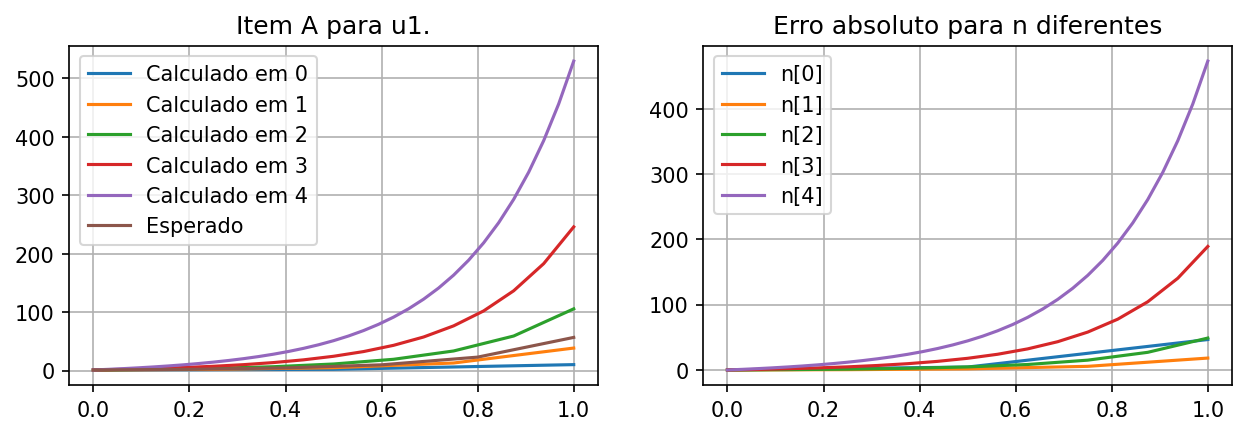

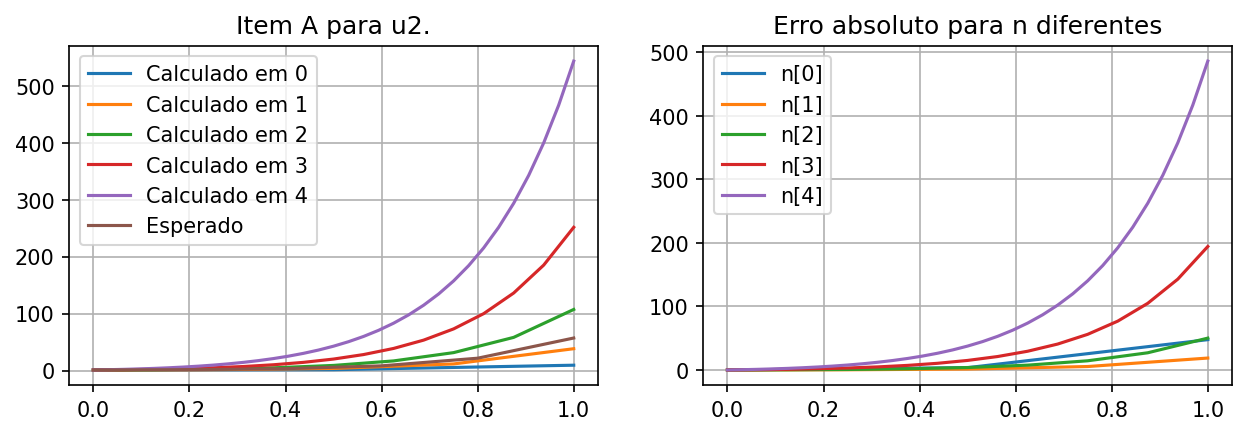

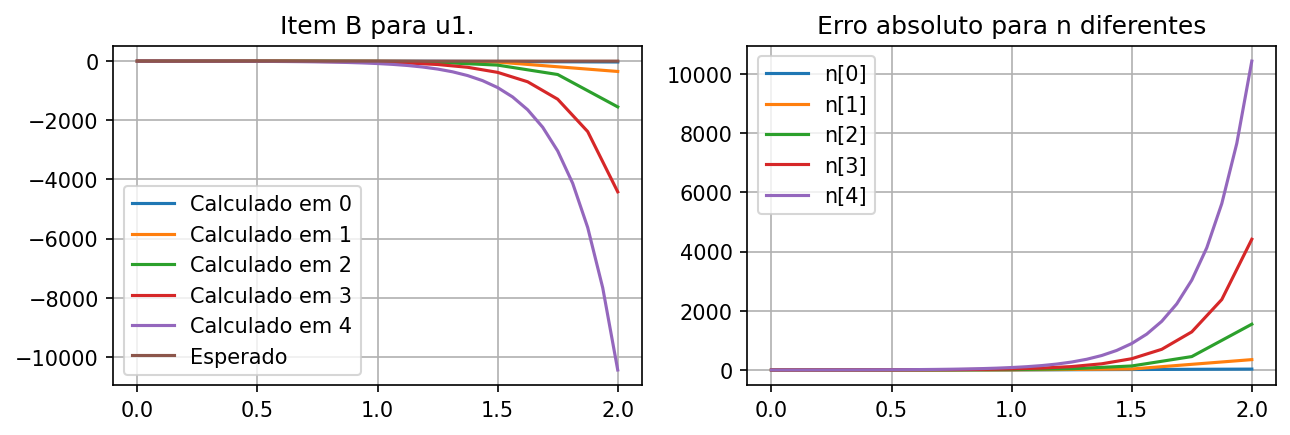

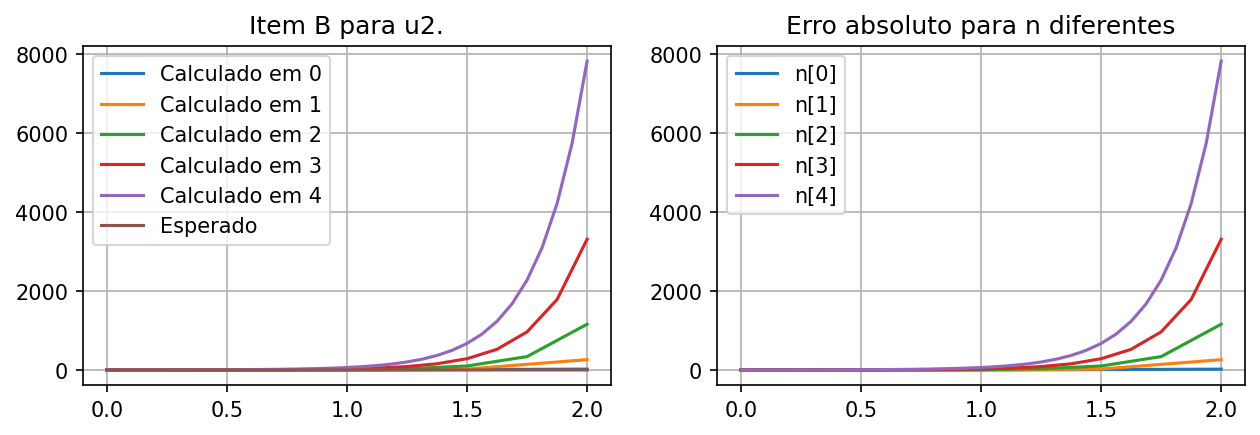

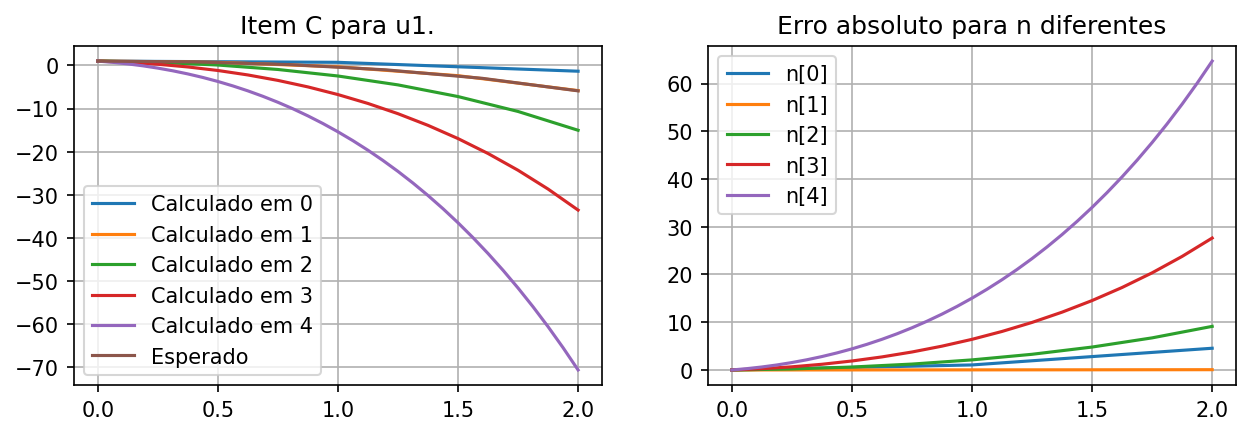

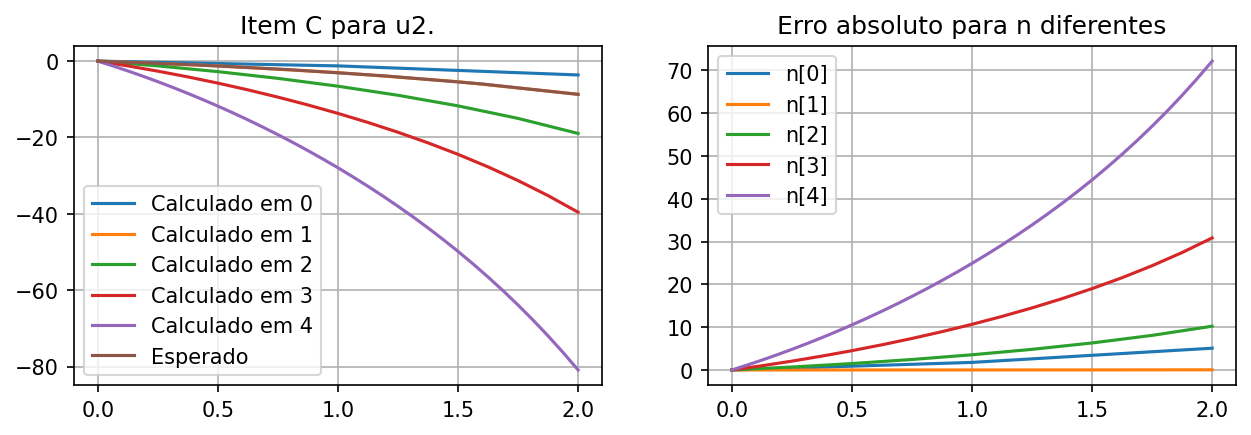

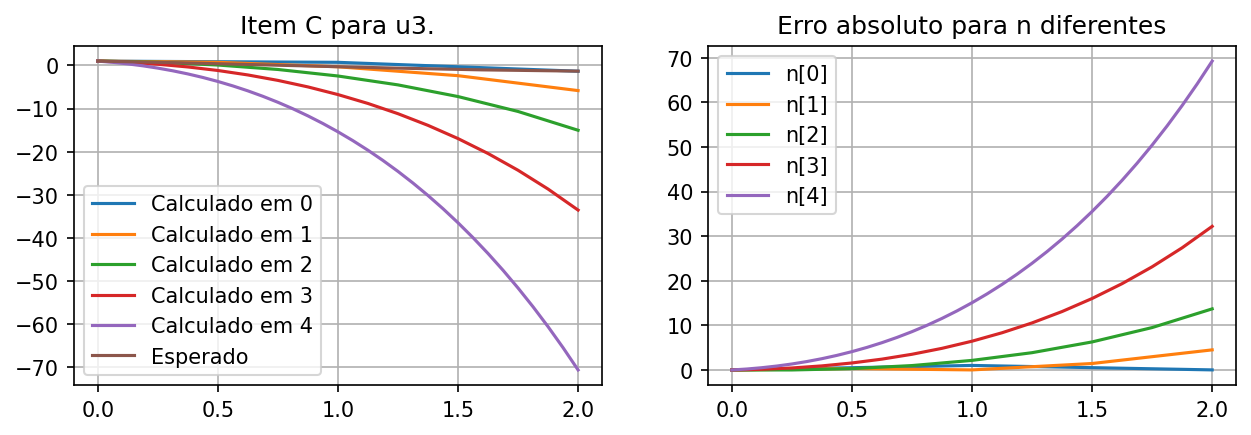

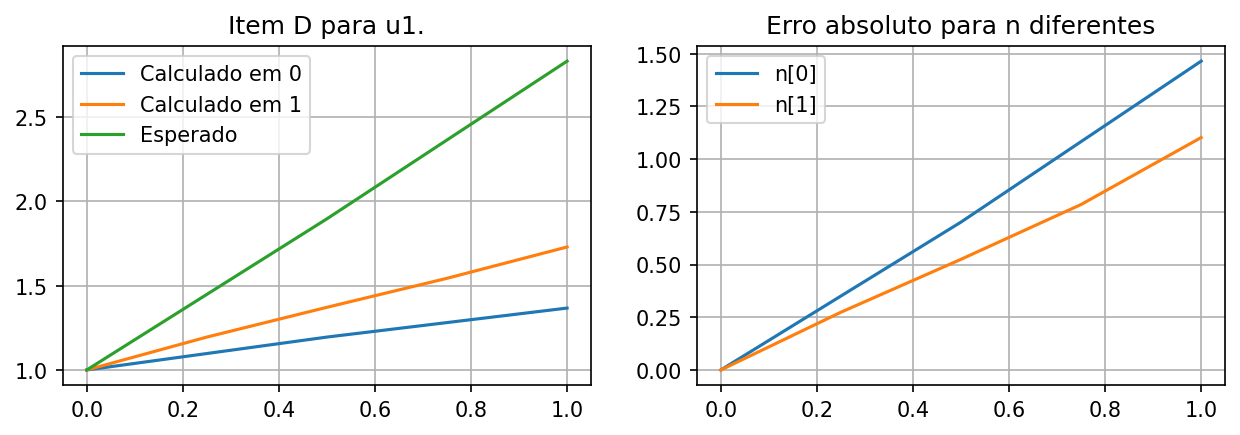

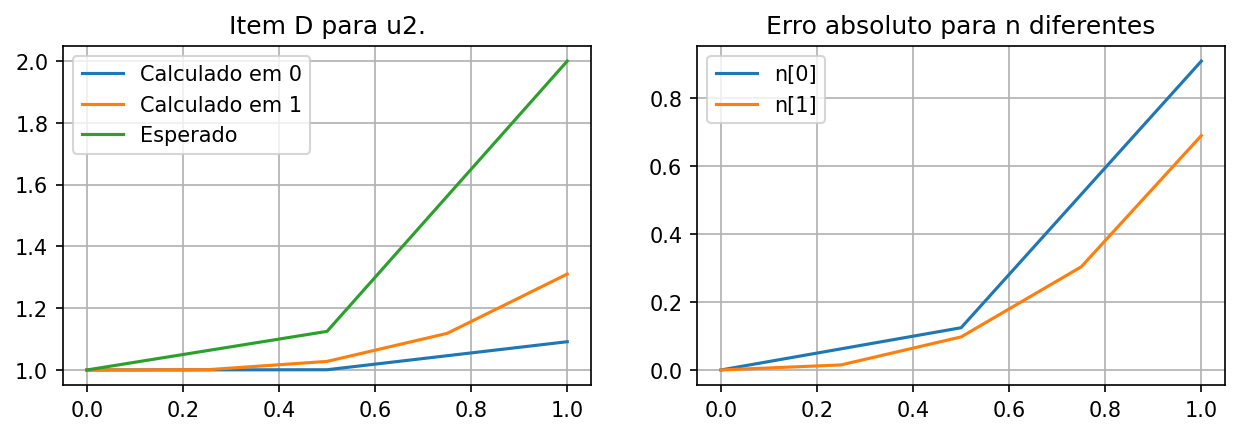

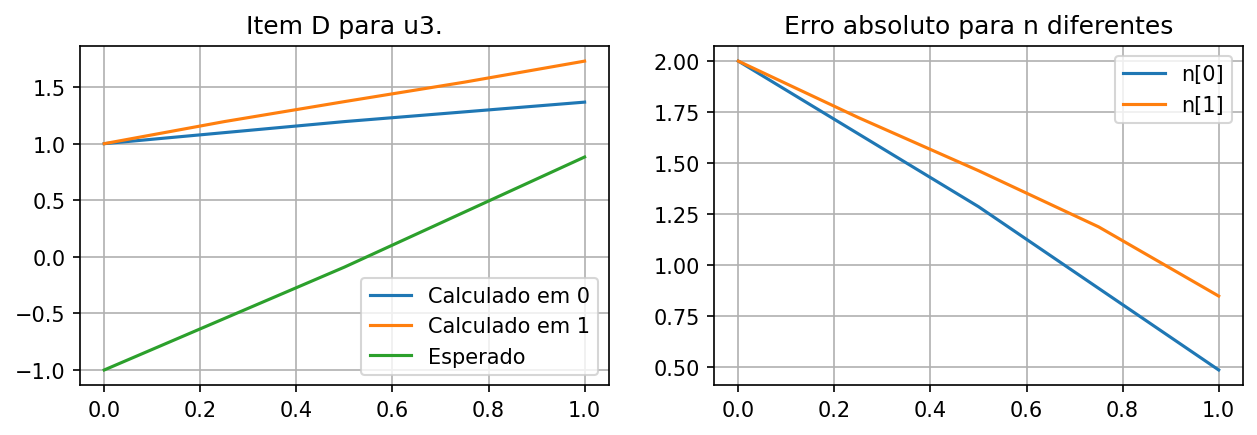

In [ ]:
# Para euler melhorado.
print("Utilizando o Euler Melhorado: ")

# Item a)
e_u1_a_rk_x, e_u1_a_rk_y = _erro_euler_mod_e_melhor_(diff_u1_a, n_a, x0_u1_a, y0_u1_a, u1_a, u2_a, None, h_a, 1, 1, intervalo_a[1])
e_u2_a_rk_x, e_u2_a_rk_y = _erro_euler_mod_e_melhor_(diff_u2_a, n_a, x0_u2_a, y0_u2_a, u1_a, u2_a, None, h_a, 1, 1, intervalo_a[1])

# Item b)
e_u1_b_rk_x, e_u1_b_rk_y = _erro_euler_mod_e_melhor_(diff_u1_b, n_b, x0_u1_b, y0_u1_b, u1_a, u2_b, None, h_b, 1, 1, intervalo_b[1])
e_u2_b_rk_x, e_u2_b_rk_y = _erro_euler_mod_e_melhor_(diff_u2_b, n_b, x0_u2_b, y0_u2_b, u1_a, u2_b, None, h_b, 1, 1, intervalo_b[1])

# Item c)
e_u1_c_rk_x, e_u1_c_rk_y = _erro_euler_mod_e_melhor_(diff_u1_c, n_c, x0_u1_c, y0_u1_c, u1_c, u2_c, u3_c, h_c, 1, 2, intervalo_c[1])
e_u2_c_rk_x, e_u2_c_rk_y = _erro_euler_mod_e_melhor_(diff_u2_c, n_c, x0_u2_c, y0_u2_c, u1_c, u2_c, u3_c, h_c, 1, 2, intervalo_c[1])
e_u3_c_rk_x, e_u3_c_rk_y = _erro_euler_mod_e_melhor_(diff_u1_c, n_c, x0_u1_c, y0_u1_c, u1_c, u2_c, u3_c, h_c, 1, 2, intervalo_c[1])

# Item d)
e_u1_d_rk_x, e_u1_d_rk_y = _erro_euler_mod_e_melhor_(diff_u1_d, n_d, x0_u1_d, y0_u1_d, u1_d, u2_d, u3_d, h_d, 1, 2, intervalo_d[1])
e_u2_d_rk_x, e_u2_d_rk_y = _erro_euler_mod_e_melhor_(diff_u2_d, n_d, x0_u2_d, y0_u2_d, u1_d, u2_d, u3_d, h_d, 1, 2, intervalo_d[1])
e_u3_d_rk_x, e_u3_d_rk_y = _erro_euler_mod_e_melhor_(diff_u1_d, n_d, x0_u1_d, y0_u1_d, u1_d, u2_d, u3_d, h_d, 1, 2, intervalo_d[1])


# Mostrando os gráficos dos resultados calculados e comparando com o erro absoluto achado.
# Item a)
_make_graph_error_md_me_(e_u1_a_rk_x, e_u1_a_rk_y, n_a, intervalo_a, u1_a, u2_a, None, 'u1', "Item A para u1.")
_make_graph_error_md_me_(e_u2_a_rk_x, e_u2_a_rk_y, n_a, intervalo_a, u1_a, u2_a, None, 'u2', "Item A para u2.")

# Item b)
_make_graph_error_md_me_(e_u1_b_rk_x, e_u1_b_rk_y, n_b, intervalo_b, u1_b, u2_b, None, 'u1', "Item B para u1.")
_make_graph_error_md_me_(e_u2_b_rk_x, e_u2_b_rk_y, n_b, intervalo_b, u1_b, u2_b, None, 'u2', "Item B para u2.")

# Item c)
_make_graph_error_md_me_(e_u1_c_rk_x, e_u1_c_rk_y, n_c, intervalo_c, u1_c, u2_c, u3_c, 'u1', "Item C para u1.")
_make_graph_error_md_me_(e_u2_c_rk_x, e_u2_c_rk_y, n_c, intervalo_c, u1_c, u2_c, u3_c, 'u2', "Item C para u2.")
_make_graph_error_md_me_(e_u3_c_rk_x, e_u3_c_rk_y, n_c, intervalo_c, u1_c, u2_c, u3_c, 'u3', "Item C para u3.")

# Item d)
_make_graph_error_md_me_(e_u1_d_rk_x, e_u1_d_rk_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u1', "Item D para u1.")
_make_graph_error_md_me_(e_u2_d_rk_x, e_u2_d_rk_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u2', "Item D para u2.")
_make_graph_error_md_me_(e_u3_d_rk_x, e_u3_d_rk_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u3', "Item D para u3.")

# FIM DO EULER MELHORADO.

Utilizando o Euler Modificado: 


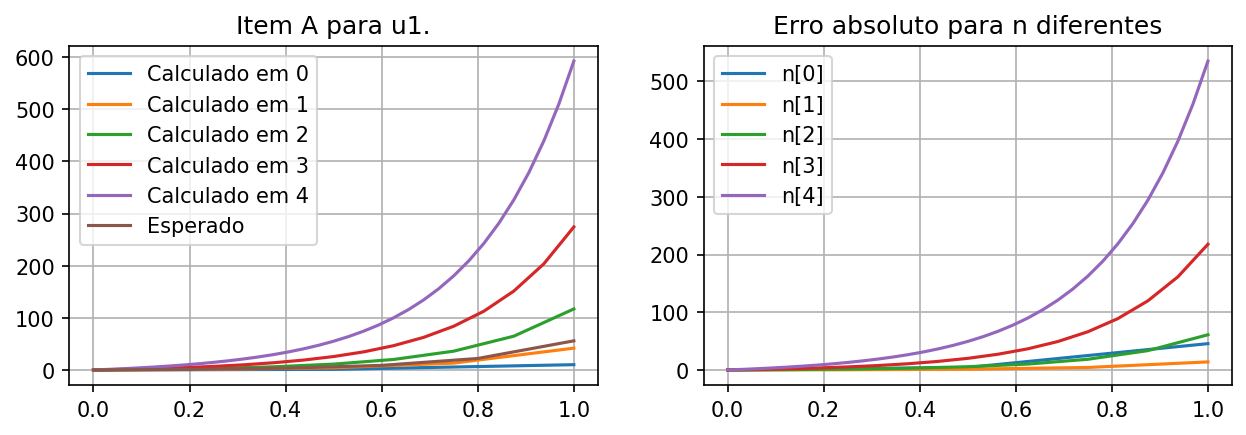

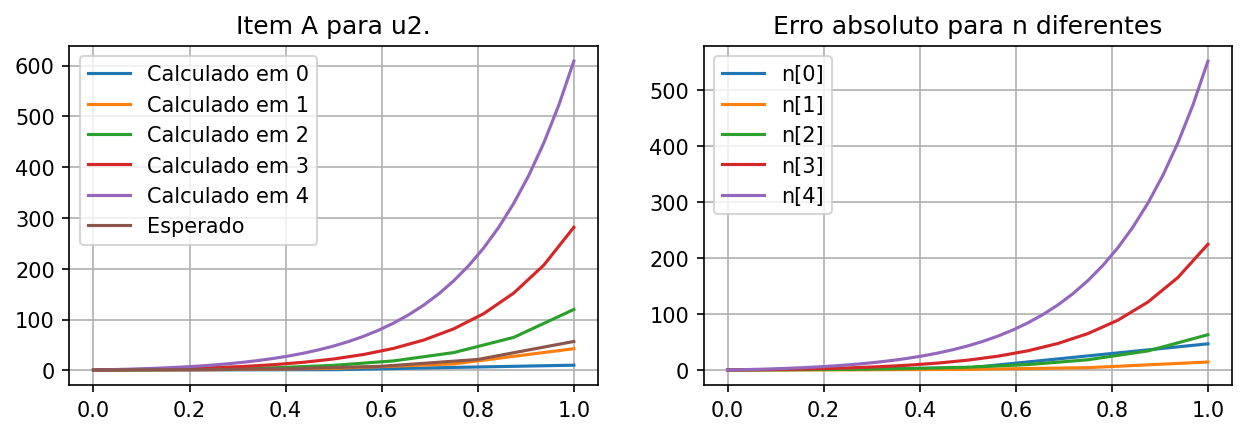

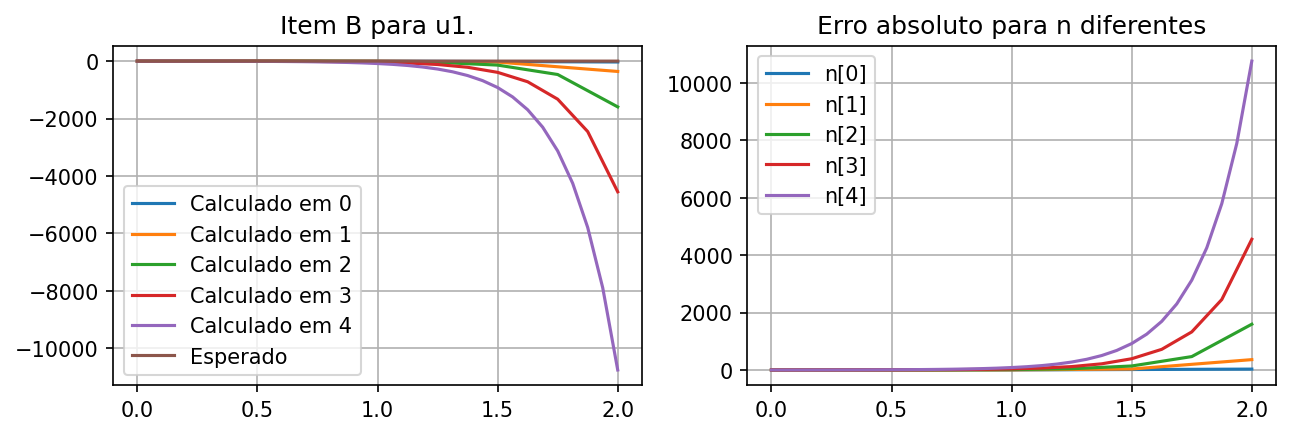

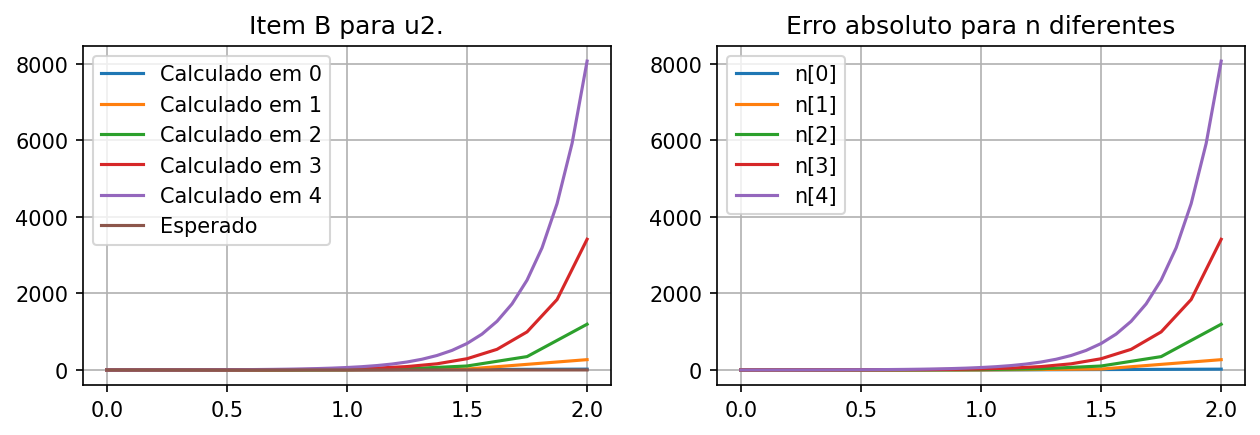

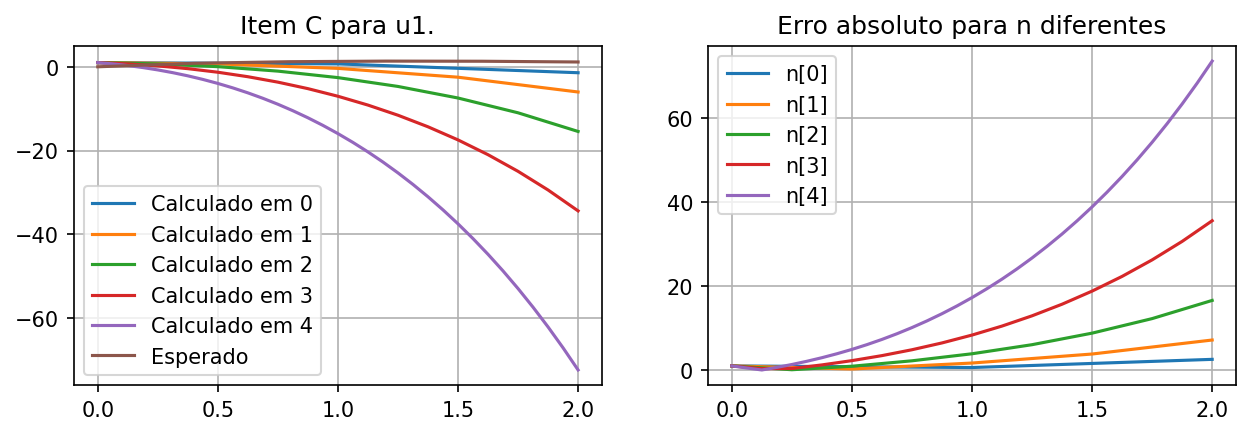

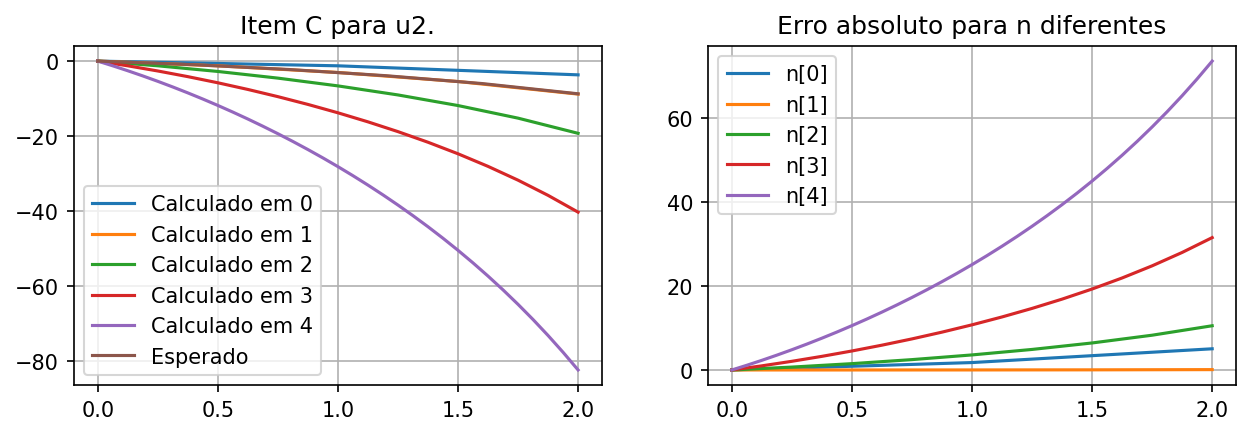

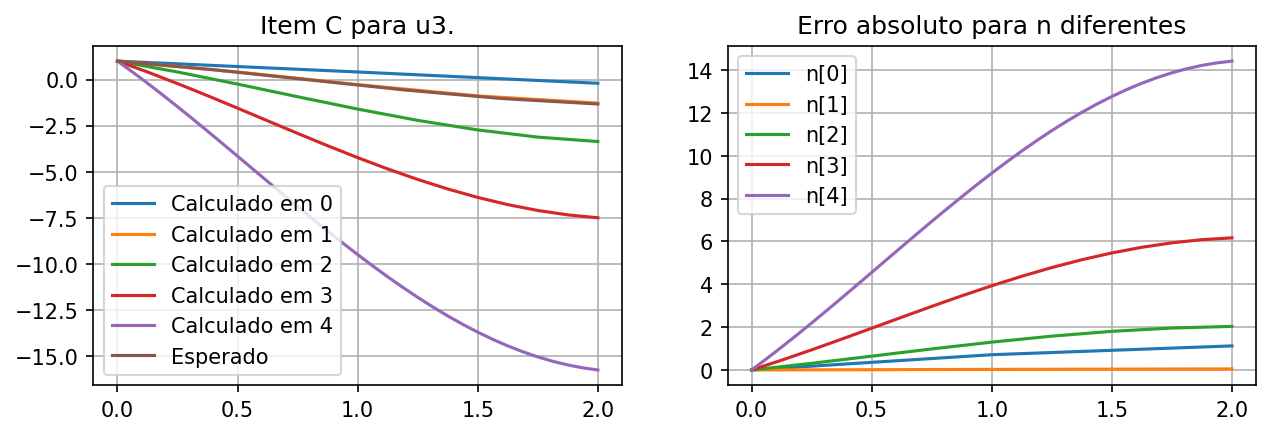

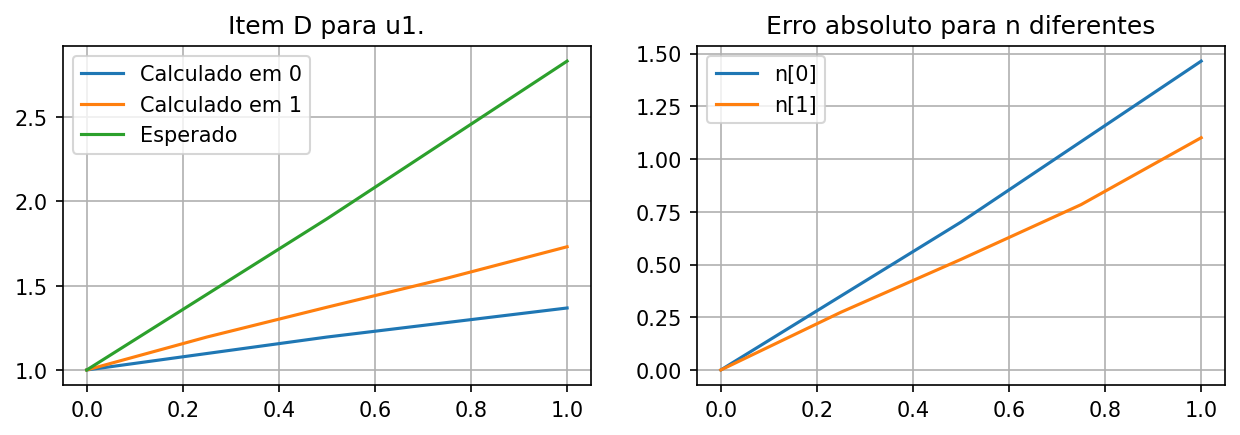

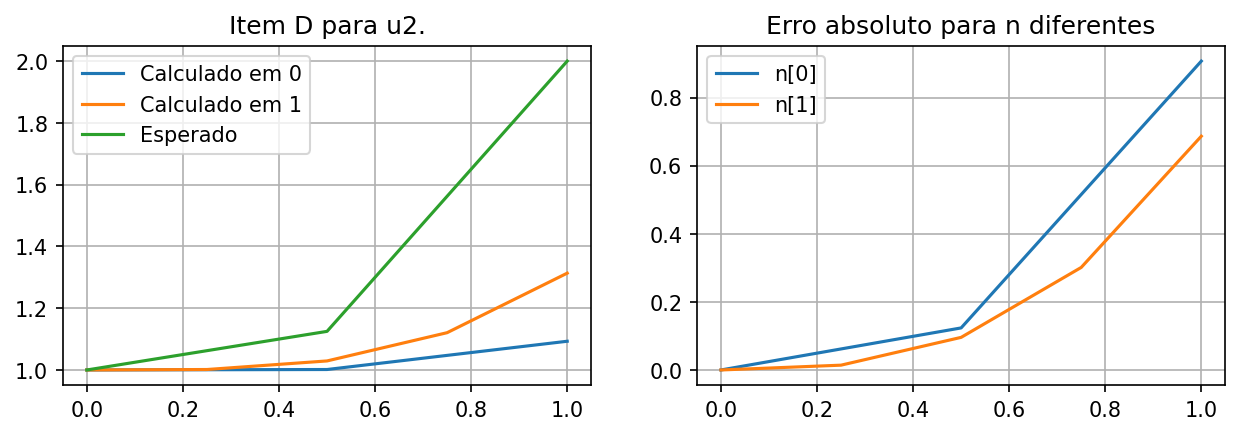

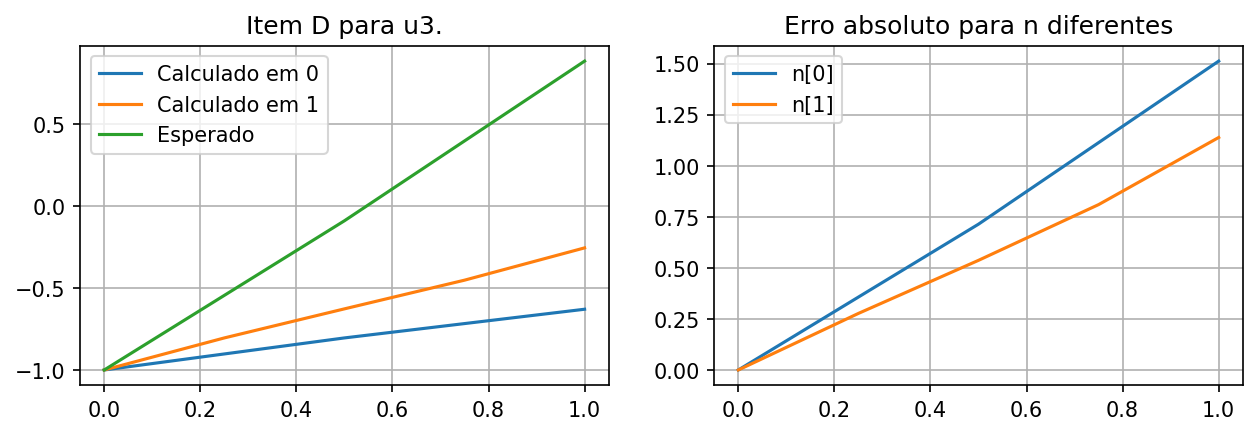

In [ ]:
# Para euler modificado.
print("Utilizando o Euler Modificado: ")

# Item a)
e_u1_a_md_x, e_u1_a_md_y = _erro_euler_mod_e_melhor_(diff_u1_a, n_a, x0_u1_a, y0_u1_a, u1_a, u2_a, None, h_a, 2, 1, intervalo_a[1])
e_u2_a_md_x, e_u2_a_md_y = _erro_euler_mod_e_melhor_(diff_u2_a, n_a, x0_u2_a, y0_u2_a, u1_a, u2_a, None, h_a, 2, 1, intervalo_a[1])

# Item b)
e_u1_b_md_x, e_u1_b_md_y = _erro_euler_mod_e_melhor_(diff_u1_b, n_b, x0_u1_b, y0_u1_b, u1_a, u2_b, None, h_b, 2, 1, intervalo_b[1])
e_u2_b_md_x, e_u2_b_md_y = _erro_euler_mod_e_melhor_(diff_u2_b, n_b, x0_u2_b, y0_u2_b, u1_a, u2_b, None, h_b, 2, 1, intervalo_b[1])

# Item c)
e_u1_c_md_x, e_u1_c_md_y = _erro_euler_mod_e_melhor_(diff_u1_c, n_c, x0_u1_c, y0_u1_c, u1_c, u2_c, u3_c, h_c, 2, 2, intervalo_c[1])
e_u2_c_md_x, e_u2_c_md_y = _erro_euler_mod_e_melhor_(diff_u2_c, n_c, x0_u2_c, y0_u2_c, u1_c, u2_c, u3_c, h_c, 2, 2, intervalo_c[1])
e_u3_c_md_x, e_u3_c_md_y = _erro_euler_mod_e_melhor_(diff_u3_c, n_c, x0_u3_c, y0_u3_c, u1_c, u2_c, u3_c, h_c, 2, 2, intervalo_c[1])

# Item d)
e_u1_d_md_x, e_u1_d_md_y = _erro_euler_mod_e_melhor_(diff_u1_d, n_d, x0_u1_d, y0_u1_d, u1_d, u2_d, u3_d, h_d, 2, 2, intervalo_d[1])
e_u2_d_md_x, e_u2_d_md_y = _erro_euler_mod_e_melhor_(diff_u2_d, n_d, x0_u2_d, y0_u2_d, u1_d, u2_d, u3_d, h_d, 2, 2, intervalo_d[1])
e_u3_d_md_x, e_u3_d_md_y = _erro_euler_mod_e_melhor_(diff_u3_d, n_d, x0_u3_d, y0_u3_d, u1_d, u2_d, u3_d, h_d, 2, 2, intervalo_d[1])


# Mostrando os gráficos dos resultados calculados e comparando com o erro absoluto achado.
# Item a)
_make_graph_error_md_me_(e_u1_a_md_x, e_u1_a_md_y, n_a, intervalo_a, u1_a, u2_a, None, 'u1', "Item A para u1.")
_make_graph_error_md_me_(e_u2_a_md_x, e_u2_a_md_y, n_a, intervalo_a, u1_a, u2_a, None, 'u2', "Item A para u2.")

# Item b)
_make_graph_error_md_me_(e_u1_b_md_x, e_u1_b_md_y, n_b, intervalo_b, u1_b, u2_b, None, 'u1', "Item B para u1.")
_make_graph_error_md_me_(e_u2_b_md_x, e_u2_b_md_y, n_b, intervalo_b, u1_b, u2_b, None, 'u2', "Item B para u2.")

# Item c)
_make_graph_error_md_me_(e_u1_c_md_x, e_u1_c_md_y, n_c, intervalo_c, u1_b, u2_c, u3_c, 'u1', "Item C para u1.")
_make_graph_error_md_me_(e_u2_c_md_x, e_u2_c_md_y, n_c, intervalo_c, u1_b, u2_c, u3_c, 'u2', "Item C para u2.")
_make_graph_error_md_me_(e_u3_c_md_x, e_u3_c_md_y, n_c, intervalo_c, u1_b, u2_c, u3_c, 'u3', "Item C para u3.")

# Item d)
_make_graph_error_md_me_(e_u1_d_md_x, e_u1_d_md_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u1', "Item D para u1.")
_make_graph_error_md_me_(e_u2_d_md_x, e_u2_d_md_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u2', "Item D para u2.")
_make_graph_error_md_me_(e_u3_d_md_x, e_u3_d_md_y, n_d, intervalo_d, u1_d, u2_d, u3_d, 'u3', "Item D para u3.")
# FIM DO EULER MODIFICADO.

Mostrando a comparação de gráficos no exercício a) Euler explícito


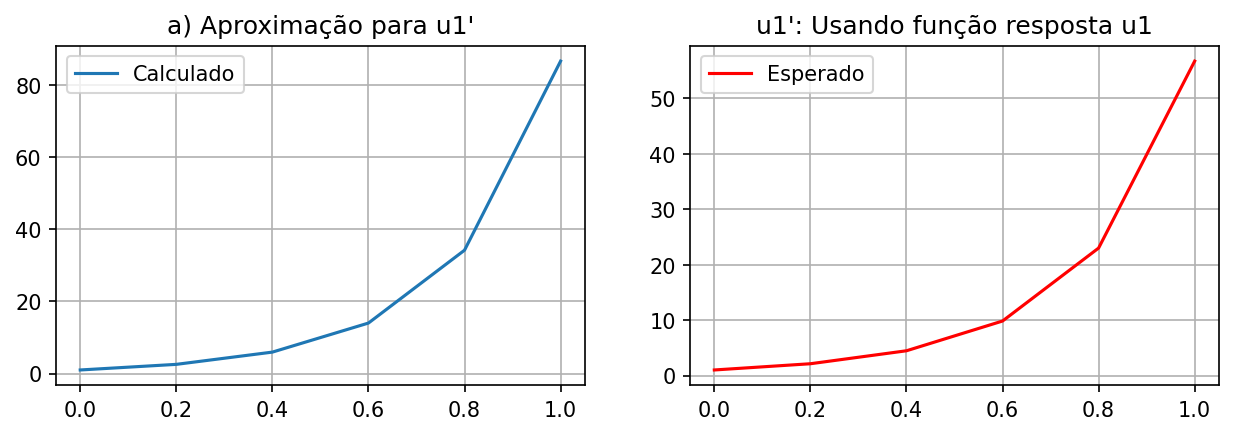

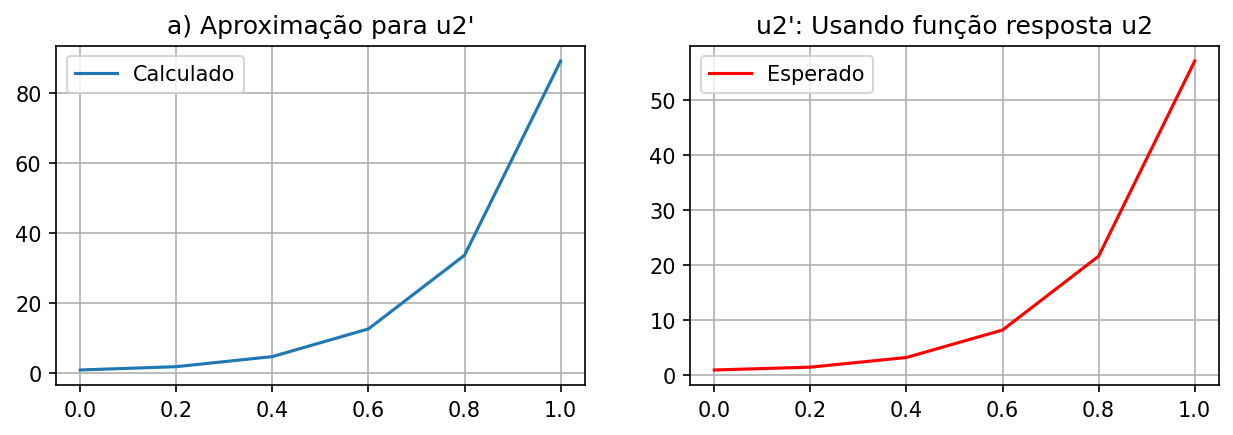

In [ ]:
print("Mostrando a comparação de gráficos no exercício a) Euler explícito")
_make_graph_compare_(x_u1_a, calc_u1_a_, u1_a, u2_a, None, n_a, intervalo_a, 1, 'u1', "a) Aproximação para u1'", "u1': Usando função resposta u1")
_make_graph_compare_(x_u2_a, calc_u2_a_, u1_a, u2_a, None, n_a, intervalo_a, 1, 'u2', "a) Aproximação para u2'", "u2': Usando função resposta u2")

Mostrando a comparação de gráficos no exercício b) Euler explícito


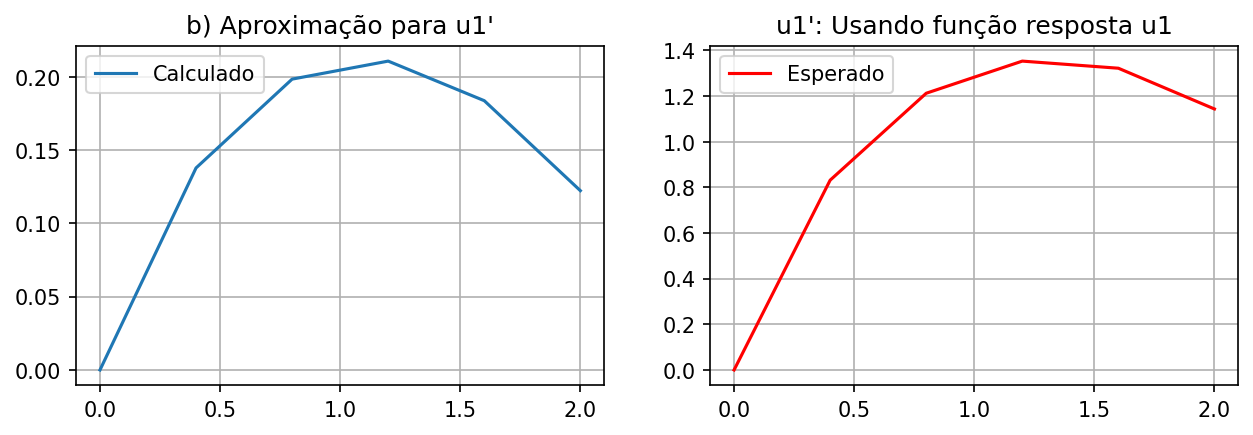

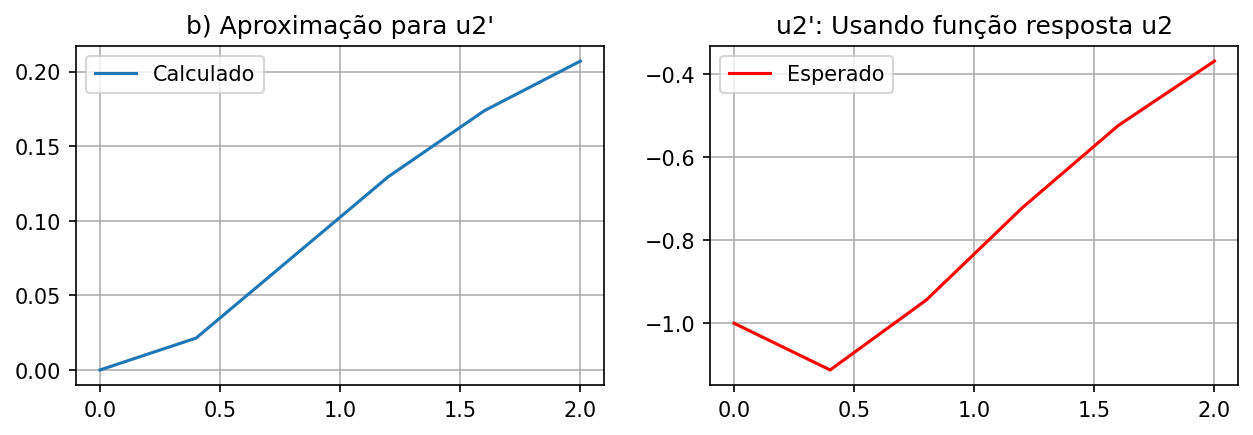

In [ ]:
print("Mostrando a comparação de gráficos no exercício b) Euler explícito")
_make_graph_compare_(x_u1_b, calc_u1_b_, u1_b, u2_b, None, n_b, intervalo_b, 1, 'u1', "b) Aproximação para u1'", "u1': Usando função resposta u1")
_make_graph_compare_(x_u2_b, calc_u2_b_, u1_b, u2_b, None, n_b, intervalo_b, 1, 'u2', "b) Aproximação para u2'", "u2': Usando função resposta u2")

Mostrando a comparação de gráficos no exercício c) Euler explícito


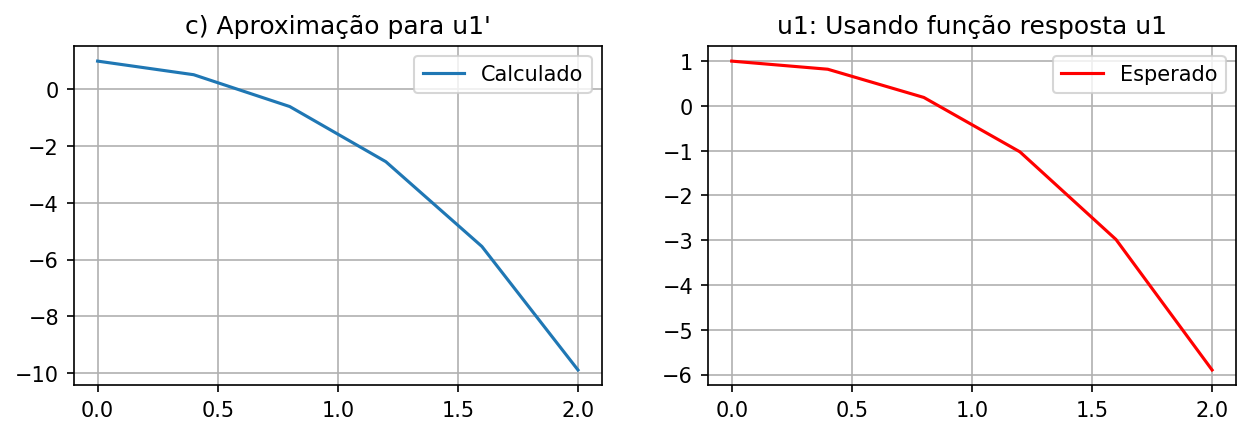

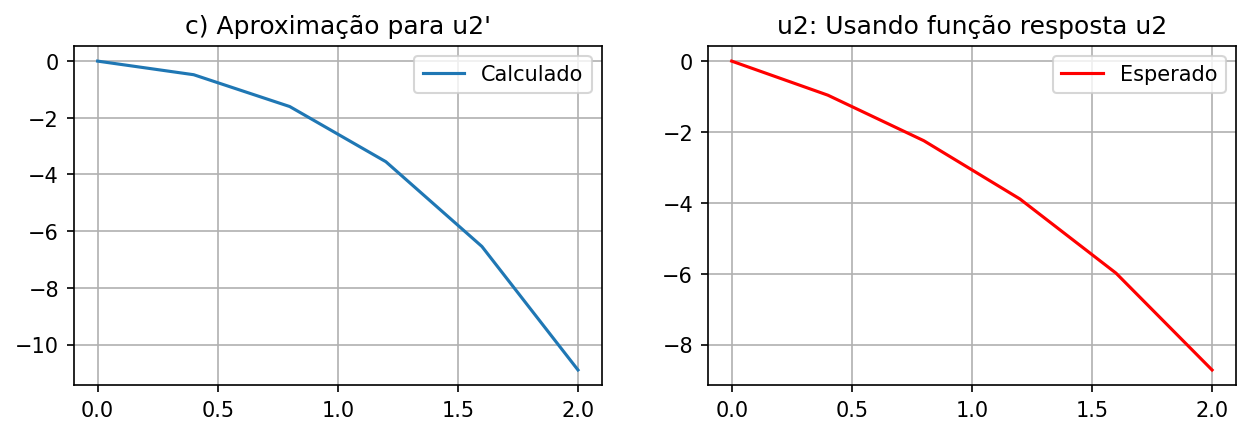

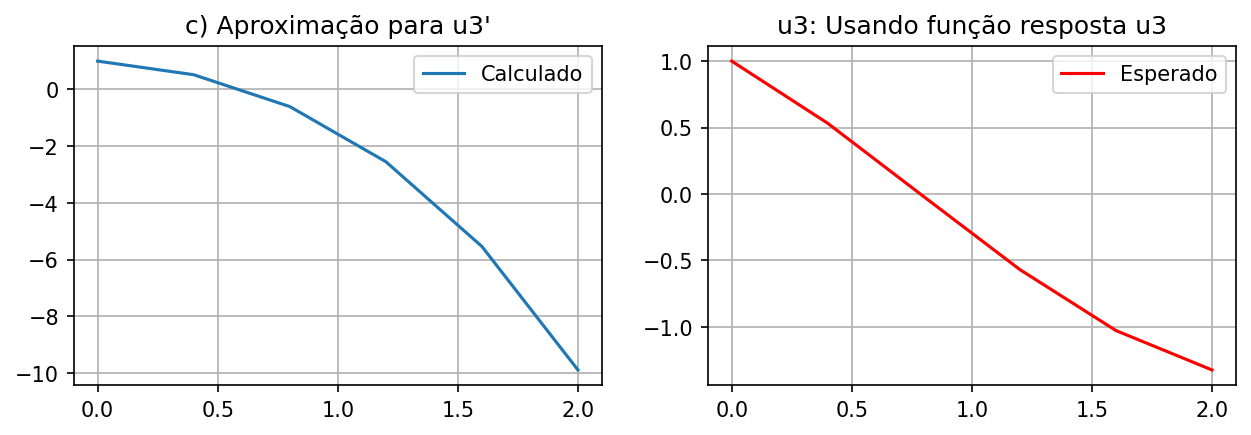

In [ ]:
print("Mostrando a comparação de gráficos no exercício c) Euler explícito")
_make_graph_compare_(x_u1_c, calc_u1_c_, u1_c, u2_c, u3_c, n_c, intervalo_c, 2, 'u1', "c) Aproximação para u1'", "u1: Usando função resposta u1")
_make_graph_compare_(x_u2_c, calc_u2_c_, u1_c, u2_c, u3_c, n_c, intervalo_c, 2, 'u2', "c) Aproximação para u2'", "u2: Usando função resposta u2")
_make_graph_compare_(x_u3_c, calc_u3_c_, u1_c, u2_c, u3_c, n_c, intervalo_c, 2, 'u3', "c) Aproximação para u3'", "u3: Usando função resposta u3")

Mostrando a comparação de gráficos no exercício d)


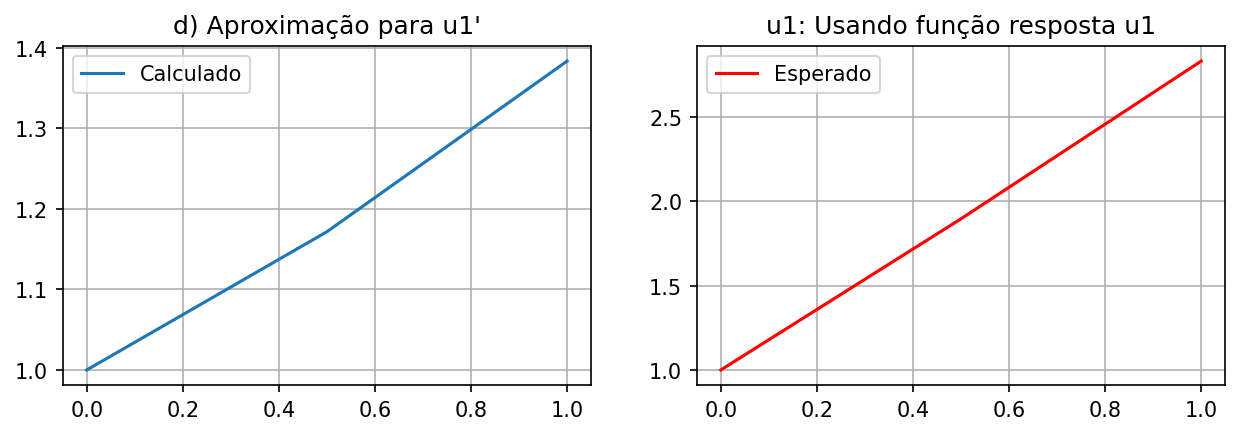

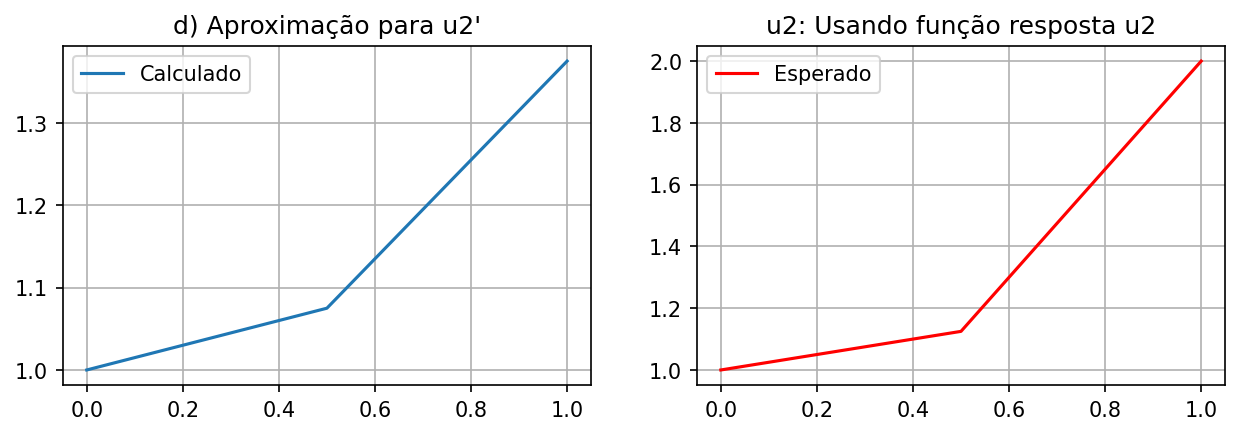

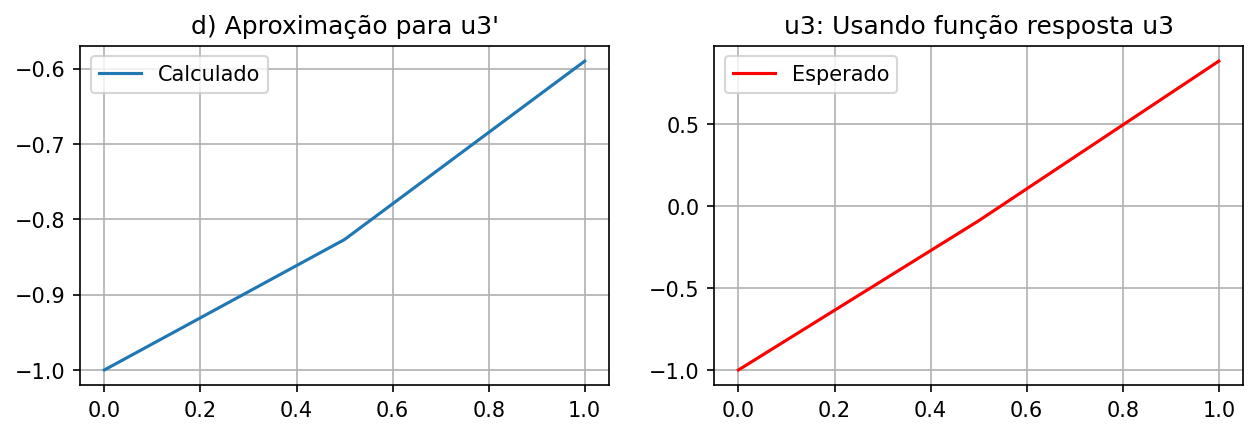

In [ ]:
print("Mostrando a comparação de gráficos no exercício d)")
_make_graph_compare_(x_u1_d, calc_u1_d_, u1_d, u2_d, u3_d, n_d, intervalo_d, 2, 'u1', "d) Aproximação para u1'", "u1: Usando função resposta u1")
_make_graph_compare_(x_u2_d, calc_u2_d_, u1_d, u2_d, u3_d, n_d, intervalo_d, 2, 'u2', "d) Aproximação para u2'", "u2: Usando função resposta u2")
_make_graph_compare_(x_u3_d, calc_u3_d_, u1_d, u2_d, u3_d, n_d, intervalo_d, 2, 'u3', "d) Aproximação para u3'", "u3: Usando função resposta u3")

No handles with labels found to put in legend.


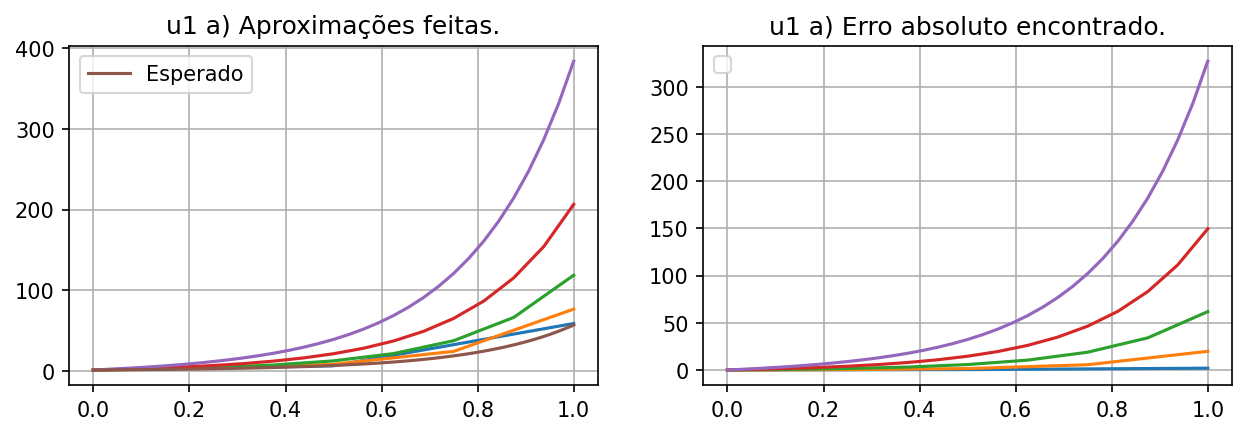

No handles with labels found to put in legend.


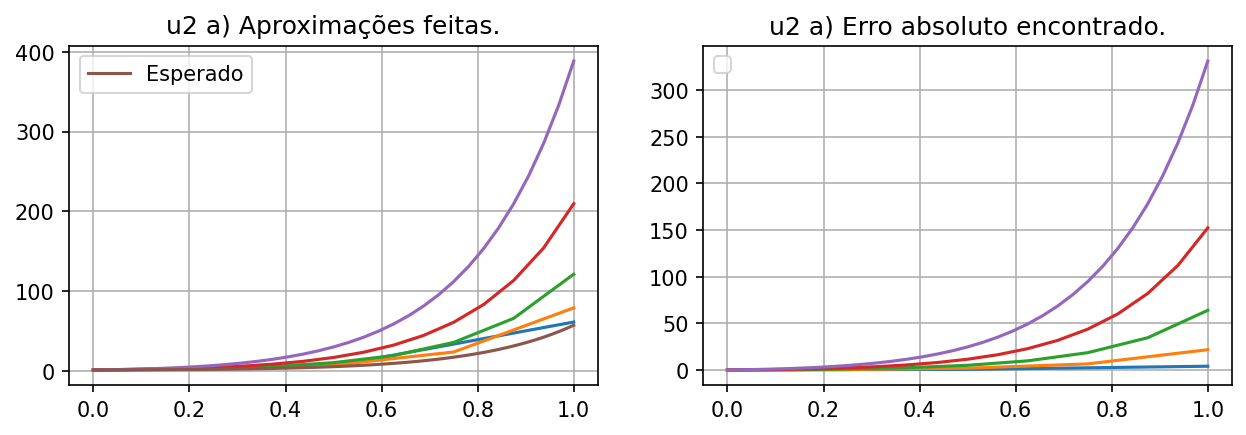

In [ ]:

"""
Mostrando o erro para u2' no exercício a) Euler explícito
"""
_make_graph_error_explicito_(erro_x_u1_a, erro_y_u1_a, u1_a, u2_a, None, "u1 a)", 'u1', intervalo_a)
_make_graph_error_explicito_(erro_x_u2_a, erro_y_u2_a, u1_a, u2_a, None, "u2 a)", 'u2', intervalo_a)

No handles with labels found to put in legend.


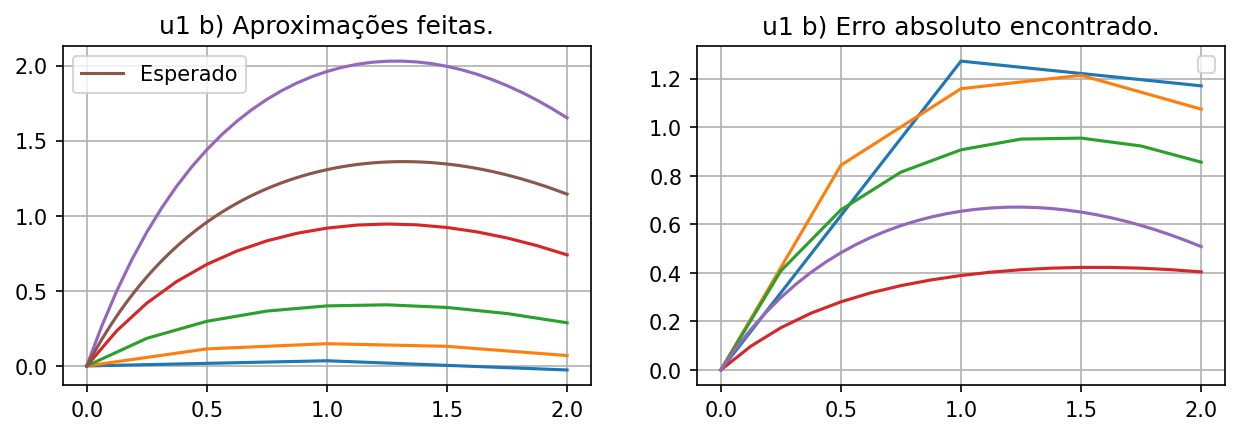

No handles with labels found to put in legend.


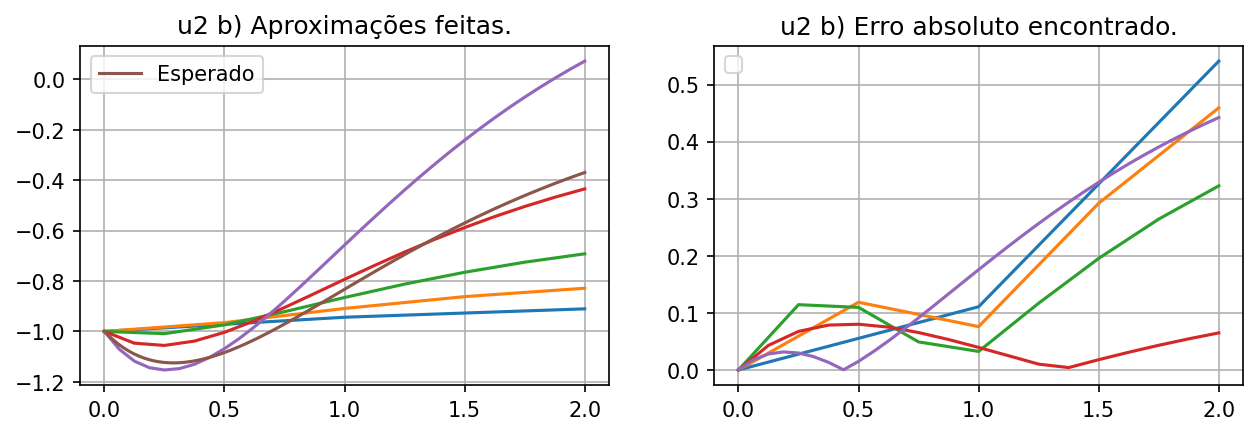

In [ ]:
"""
Mostrando o erro para u1' no exercício b) Euler explícito
"""
_make_graph_error_explicito_(erro_x_u1_b, erro_y_u1_b, u1_b, u2_b, None, "u1 b)", 'u1', intervalo_b)
_make_graph_error_explicito_(erro_x_u2_b, erro_y_u2_b, u1_b, u2_b, None, "u2 b)", 'u2', intervalo_b)


No handles with labels found to put in legend.


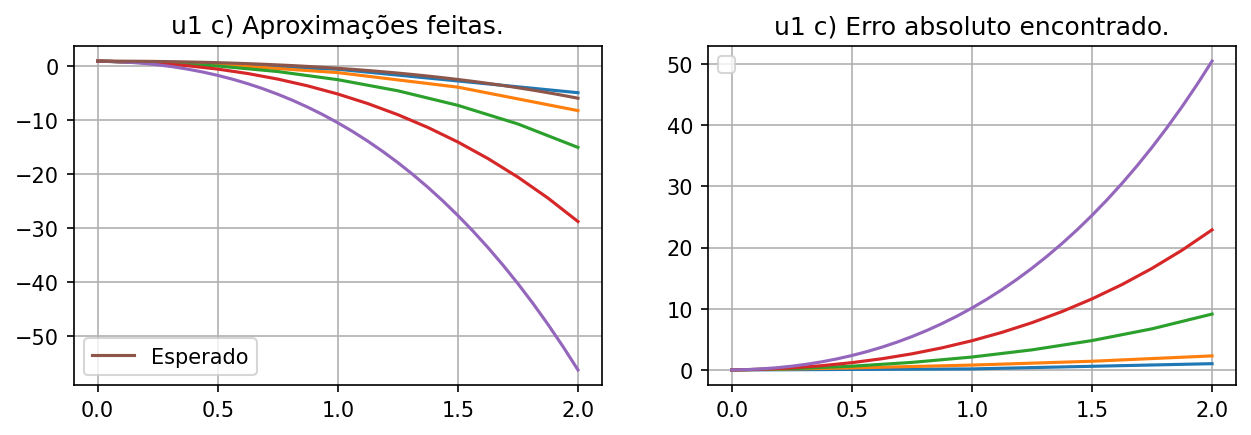

No handles with labels found to put in legend.


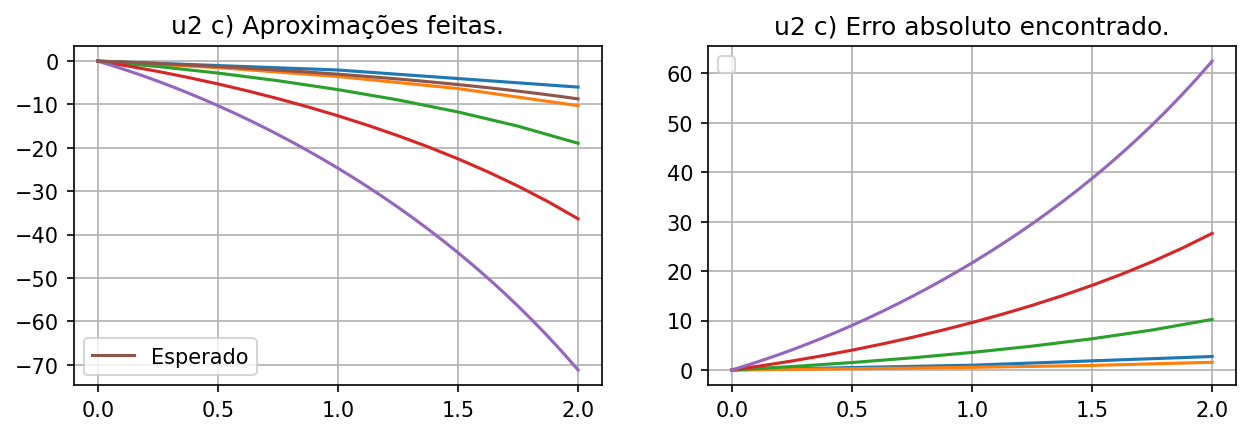

No handles with labels found to put in legend.


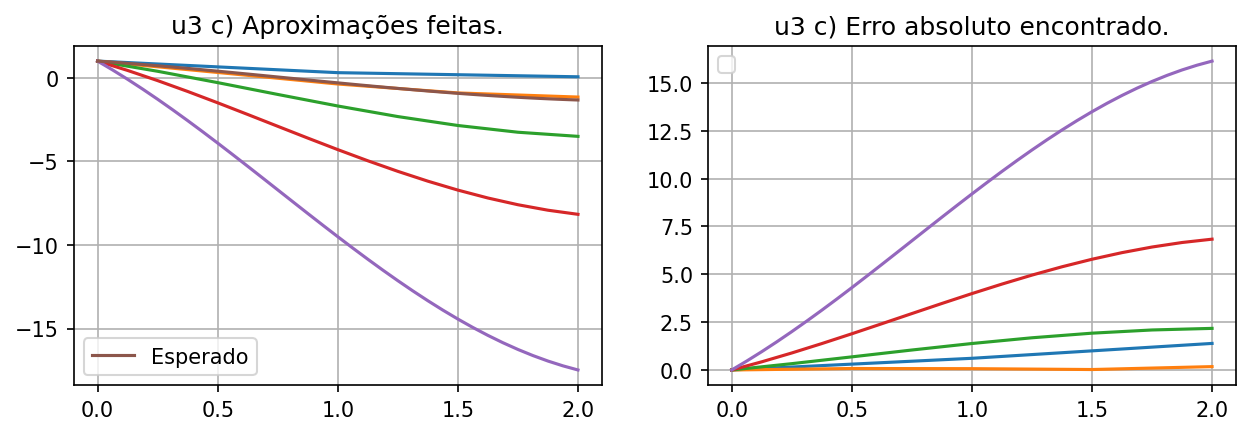

In [ ]:
"""
Mostrando o erro para u1' no exercício c) Euler explícito
"""
_make_graph_error_explicito_(erro_x_u1_c, erro_y_u1_c, u1_c, u2_c, u3_c, "u1 c)", 'u1', intervalo_c)
_make_graph_error_explicito_(erro_x_u2_c, erro_y_u2_c, u1_c, u2_c, u3_c, "u2 c)", 'u2', intervalo_c)
_make_graph_error_explicito_(erro_x_u3_c, erro_y_u3_c, u1_c, u2_c, u3_c, "u3 c)", 'u3', intervalo_c)

No handles with labels found to put in legend.


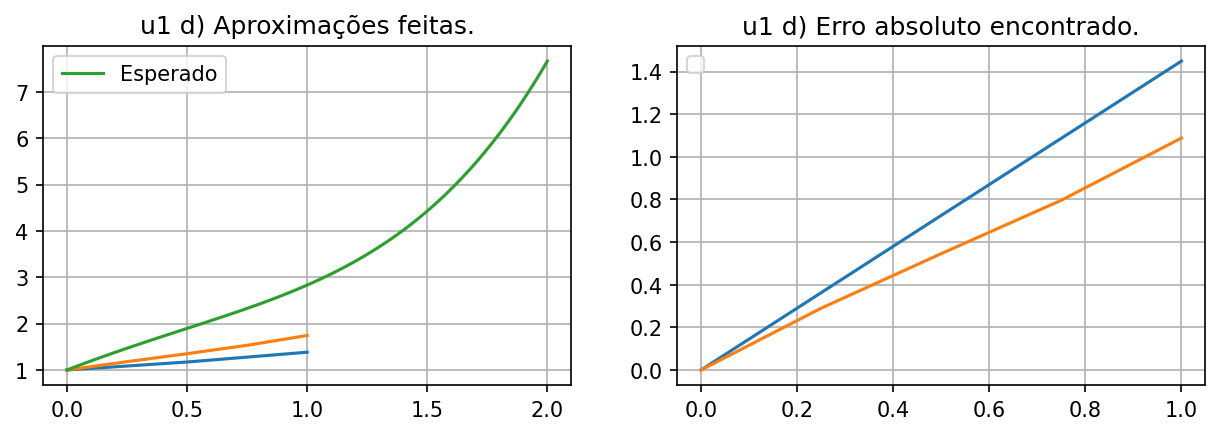

No handles with labels found to put in legend.


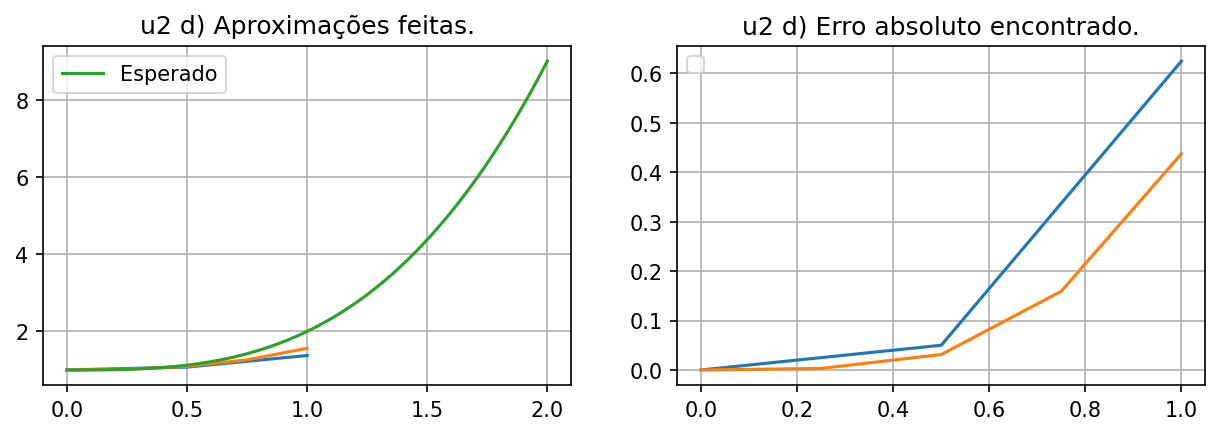

No handles with labels found to put in legend.


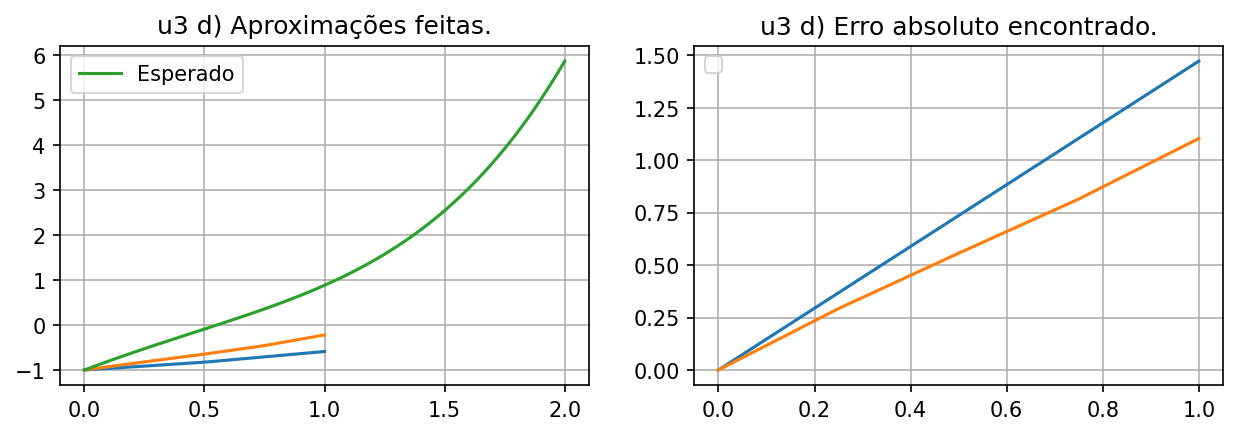

In [ ]:
"""
Mostrando o erro para u1' no exercício d) Euler explícito
"""

_make_graph_error_explicito_(erro_x_u1_d, erro_y_u1_d, u1_d, u2_d, u3_d, "u1 d)", 'u1', intervalo_c)
_make_graph_error_explicito_(erro_x_u2_d, erro_y_u2_d, u1_d, u2_d, u3_d, "u2 d)", 'u2', intervalo_c)
_make_graph_error_explicito_(erro_x_u3_d, erro_y_u3_d, u1_d, u2_d, u3_d, "u3 d)", 'u3', intervalo_c)

In [ ]:
"""
  Tabela com a comparação dos resultados.
"""
# Item a)

v_u1_a = list()
v_u2_a = list()
for i in range(len(e_u1_a_md_x)):
  v_u1_a.append(u1_a(x_u1_a[i]))
  v_u2_a.append(u2_a(x_u2_a[i]))

exato_a = {
    'u1': [np.around(v_u1_a[i], decimals=4) for i in range(len(v_u1_a))],
    'u2': [np.around(v_u2_a[i], decimals=4) for i in range(len(v_u2_a))],
}

# Criando as tabelas de erro.

# u1
erros_u1_a_md = {
    'Erro Euler Modificado': [np.around(e_u1_a_md_y[i], decimals=4) for i in range(len(e_u1_a_md_y))],
    'Intervalo x': [np.around(e_u1_a_md_x[i], decimals=4) for i in range(len(e_u1_a_md_x))],
}

erros_u1_a_rk = {
    'Erro Euler Melhorado': [np.around(e_u1_a_rk_y[i], decimals=4) for i in range(len(e_u1_a_rk_y))],
    'Intervalo x': [np.around(e_u1_a_rk_x[i], decimals=4) for i in range(len(e_u1_a_rk_x))],
}

erros_u1_a_exp = {
    'Erro Euler explícito': [np.around(erro_y_u1_a[i], decimals=4) for i in range(len(erro_y_u1_a))],
    'Intervalo x': [np.around(erro_x_u1_a[i], decimals=4) for i in range(len(erro_x_u1_a))],
}

# u2
erros_u2_a_md = {
    'Erro Euler Modificado': [np.around(e_u2_a_md_y[i], decimals=4) for i in range(len(erro_y_u2_a))],
    'Intervalo x': [np.around(e_u2_a_md_x[i], decimals=4) for i in range(len(erro_x_u2_a))],
}

erros_u2_a_rk = {
    'Erro Euler Melhorado': [np.around(e_u2_a_rk_y[i], decimals=4) for i in range(len(erro_y_u2_a))],
    'Intervalo x': [np.around(e_u2_a_rk_x[i], decimals=4) for i in range(len(erro_x_u2_a))],
}

erros_u2_a_exp = {
    'Erro Euler explícito': [np.around(erro_y_u2_a[i], decimals=4) for i in range(len(erro_y_u2_a))],
    'Intervalo x': [np.around(erro_x_u2_a[i], decimals=4) for i in range(len(erro_x_u2_a))],
}

print("Esperado pela solução exata.")
print(tabulate(exato_a, headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item a) em u1")
print(tabulate(erros_u1_a_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_a_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_a_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item a) em u2")
print(tabulate(erros_u2_a_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_a_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_a_rk , headers="keys", tablefmt='fancy_grid'))

Esperado pela solução exata.
╒═════════╤═════════╕
│      u1 │      u2 │
╞═════════╪═════════╡
│  1      │  1      │
├─────────┼─────────┤
│  2.125  │  1.5116 │
├─────────┼─────────┤
│  4.4651 │  3.266  │
├─────────┼─────────┤
│  9.8324 │  8.2563 │
├─────────┼─────────┤
│ 23.0026 │ 21.6689 │
╘═════════╧═════════╛
    Erros para o Item a) em u1
╒══════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════╕
│ Erro Euler explícito                                                     │ Intervalo x                                                            │
╞══════════════════════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════════════╡
│ [ 1.      6.1886 58.6398]                                                │ [0.  0.5 1. ]                                                          │
├─────────────────────────────────────────────────────

In [ ]:
# Item b)

v_u1_b = list()
v_u2_b = list()
for i in range(len(e_u1_b_md_x)):
  v_u1_b.append(u1_b(x_u1_b[i]))
  v_u2_b.append(u2_b(x_u2_b[i]))

exato_b = {
    'u1': [np.around(v_u1_b[i], decimals=4) for i in range(len(v_u1_b))],
    'u2': [np.around(v_u2_b[i], decimals=4) for i in range(len(v_u2_b))],
}

# u1
erros_u1_b_md = {
    'Erro Euler Modificado': [np.around(e_u1_b_md_y[i], decimals=4) for i in range(len(e_u1_b_md_y))],
    'Intervalo x': [np.around(e_u1_b_md_x[i], decimals=4) for i in range(len(e_u1_b_md_x))],
}

erros_u1_b_rk = {
    'Erro Euler Melhorado': [np.around(e_u1_b_rk_y[i], decimals=4) for i in range(len(e_u1_b_rk_y))],
    'Intervalo x': [np.around(e_u1_b_rk_x[i], decimals=4) for i in range(len(e_u1_b_rk_x))],
}

erros_u1_b_exp = {
    'Erro Euler explícito': [np.around(erro_y_u1_b[i], decimals=4) for i in range(len(erro_y_u1_b))],
    'Intervalo x': [np.around(erro_x_u1_b[i], decimals=4) for i in range(len(erro_x_u1_b))],
}

# u2
erros_u2_b_md = {
    'Erro Euler Modificado': [np.around(e_u2_b_md_y[i], decimals=4) for i in range(len(erro_y_u2_b))],
    'Intervalo x': [np.around(e_u2_b_md_x[i], decimals=4) for i in range(len(erro_x_u2_b))],
}

erros_u2_b_rk = {
    'Erro Euler Melhorado': [np.around(e_u2_b_rk_y[i], decimals=4) for i in range(len(erro_y_u2_b))],
    'Intervalo x': [np.around(e_u2_b_rk_x[i], decimals=4) for i in range(len(erro_x_u2_b))],
}

erros_u2_b_exp = {
    'Erro Euler explícito': [np.around(erro_y_u2_b[i], decimals=4) for i in range(len(erro_y_u2_b))],
    'Intervalo x': [np.around(erro_x_u2_b[i], decimals=4) for i in range(len(erro_x_u2_b))],
}

print("Esperado pela solução exata.")
print(tabulate(exato_b, headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item b) em u1")
print(tabulate(erros_u1_b_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_b_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_b_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item b) em u2")
print(tabulate(erros_u2_b_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_b_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_b_rk , headers="keys", tablefmt='fancy_grid'))

Esperado pela solução exata.
╒════════╤═════════╕
│     u1 │      u2 │
╞════════╪═════════╡
│ 0      │ -1      │
├────────┼─────────┤
│ 0.8314 │ -1.1123 │
├────────┼─────────┤
│ 1.2122 │ -0.9442 │
├────────┼─────────┤
│ 1.353  │ -0.7221 │
├────────┼─────────┤
│ 1.3218 │ -0.5242 │
╘════════╧═════════╛
    Erros para o Item b) em u1
╒════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════╕
│ Erro Euler explícito                                                   │ Intervalo x                                                              │
╞════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════╡
│ [ 0.      0.0346 -0.0268]                                              │ [0. 1. 2.]                                                               │
├──────────────────────────────────────────────────────────────────

In [ ]:
# Item c)

v_u1_c = list()
v_u2_c = list()
v_u3_c = list()

for i in range(len(e_u1_c_md_x)):
  v_u1_c.append(u1_c(x_u1_c[i]))
  v_u2_c.append(u2_c(x_u2_c[i]))
  v_u3_c.append(u3_c(x_u3_c[i]))

exato_c = {
    'u1': [np.around(v_u1_c[i], decimals=4) for i in range(len(v_u1_c))],
    'u2': [np.around(v_u2_c[i], decimals=4) for i in range(len(v_u2_c))],
    'u3': [np.around(v_u3_c[i], decimals=4) for i in range(len(v_u3_c))],
}

# u1
erros_u1_c_md = {
    'Erro Euler Modificado': [np.around(e_u1_c_md_y[i], decimals=4) for i in range(len(e_u1_c_md_y))],
    'Intervalo x': [np.around(e_u1_c_md_x[i], decimals=4) for i in range(len(e_u1_c_md_x))],
}

erros_u1_c_rk = {
    'Erro Euler Melhorado': [np.around(e_u1_c_rk_y[i], decimals=4) for i in range(len(e_u1_c_rk_y))],
    'Intervalo x': [np.around(e_u1_c_rk_x[i], decimals=4) for i in range(len(e_u1_c_rk_x))],
}

erros_u1_c_exp = {
    'Erro Euler explícito': [np.around(erro_y_u1_c[i], decimals=4) for i in range(len(erro_y_u1_c))],
    'Intervalo x': [np.around(erro_x_u1_c[i], decimals=4) for i in range(len(erro_x_u1_c))],
}

# u2
erros_u2_c_md = {
    'Erro Euler Modificado': [np.around(e_u2_c_md_y[i], decimals=4) for i in range(len(erro_y_u2_c))],
    'Intervalo x': [np.around(e_u2_c_md_x[i], decimals=4) for i in range(len(erro_x_u2_c))],
}

erros_u2_c_rk = {
    'Erro Euler Melhorado': [np.around(e_u2_c_rk_y[i], decimals=4) for i in range(len(erro_y_u2_c))],
    'Intervalo x': [np.around(e_u2_c_rk_x[i], decimals=4) for i in range(len(erro_x_u2_c))],
}

erros_u2_c_exp = {
    'Erro Euler explícito': [np.around(erro_y_u2_c[i], decimals=4) for i in range(len(erro_y_u2_c))],
    'Intervalo x': [np.around(erro_x_u2_c[i], decimals=4) for i in range(len(erro_x_u2_c))],
}

# u3
erros_u3_c_md = {
    'Erro Euler Modificado': [np.around(e_u3_c_md_y[i], decimals=4) for i in range(len(erro_y_u3_c))],
    'Intervalo x': [np.around(e_u3_c_md_x[i], decimals=4) for i in range(len(erro_x_u3_c))],
}

erros_u3_c_rk = {
    'Erro Euler Melhorado': [np.around(e_u3_c_rk_y[i], decimals=4) for i in range(len(erro_y_u3_c))],
    'Intervalo x': [np.around(e_u3_c_rk_x[i], decimals=4) for i in range(len(erro_x_u3_c))],
}

erros_u3_c_exp = {
    'Erro Euler explícito': [np.around(erro_y_u3_c[i], decimals=4) for i in range(len(erro_y_u3_c))],
    'Intervalo x': [np.around(erro_x_u3_c[i], decimals=4) for i in range(len(erro_x_u3_c))],
}

print("Esperado pela solução exata.")
print(tabulate(exato_c, headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item c) em u1")
print(tabulate(erros_u1_c_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_c_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_c_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item c) em u2")
print(tabulate(erros_u2_c_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_c_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_c_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item c) em u3")
print(tabulate(erros_u3_c_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u3_c_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u3_c_rk , headers="keys", tablefmt='fancy_grid'))

Esperado pela solução exata.
╒═════════╤═════════╤═════════╕
│      u1 │      u2 │      u3 │
╞═════════╪═════════╪═════════╡
│  1      │  0      │  1      │
├─────────┼─────────┼─────────┤
│  0.8187 │ -0.9602 │  0.5316 │
├─────────┼─────────┼─────────┤
│  0.1885 │ -2.2462 │ -0.0206 │
├─────────┼─────────┼─────────┤
│ -1.0257 │ -3.8898 │ -0.5697 │
├─────────┼─────────┼─────────┤
│ -2.9827 │ -5.9818 │ -1.0288 │
╘═════════╧═════════╧═════════╛
    Erros para o Item c) em u1
╒══════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════╕
│ Erro Euler explícito                                                     │ Intervalo x                                                              │
╞══════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════╡
│ [ 1.     -0.5097 -4.867 ]                                         

In [ ]:
# Item d)

v_u1_d = list()
v_u2_d = list()
v_u3_d = list()

for i in range(len(e_u1_d_md_x)):
  v_u1_d.append(u1_d(x_u1_d[i]))
  v_u2_d.append(u2_d(x_u2_d[i]))
  v_u3_d.append(u3_d(x_u3_d[i]))

exato_d = {
    'u1': [np.around(v_u1_d[i], decimals=4) for i in range(len(v_u1_d))],
    'u2': [np.around(v_u2_d[i], decimals=4) for i in range(len(v_u2_d))],
    'u3': [np.around(v_u3_d[i], decimals=4) for i in range(len(v_u3_d))],
}
# u1
erros_u1_d_md = {
    'Erro Euler Modificado': [np.around(e_u1_d_md_y[i], decimals=4) for i in range(len(e_u1_d_md_y))],
    'Intervalo x': [np.around(e_u1_d_md_x[i], decimals=4) for i in range(len(e_u1_d_md_x))],
}

erros_u1_d_rk = {
    'Erro Euler Melhorado': [np.around(e_u1_d_rk_y[i], decimals=4) for i in range(len(e_u1_d_rk_y))],
    'Intervalo x': [np.around(e_u1_d_rk_x[i], decimals=4) for i in range(len(e_u1_d_rk_x))],
}

erros_u1_d_exp = {
    'Erro Euler explícito': [np.around(erro_y_u1_d[i], decimals=4) for i in range(len(erro_y_u1_d))],
    'Intervalo x': [np.around(erro_x_u1_d[i], decimals=4) for i in range(len(erro_x_u1_d))],
}

# u2
erros_u2_d_md = {
    'Erro Euler Modificado': [np.around(e_u2_d_md_y[i], decimals=4) for i in range(len(erro_y_u2_d))],
    'Intervalo x': [np.around(e_u2_d_md_x[i], decimals=4) for i in range(len(erro_x_u2_d))],
}

erros_u2_d_rk = {
    'Erro Euler Melhorado': [np.around(e_u2_d_rk_y[i], decimals=4) for i in range(len(erro_y_u2_d))],
    'Intervalo x': [np.around(e_u2_d_rk_x[i], decimals=4) for i in range(len(erro_x_u2_d))],
}

erros_u2_d_exp = {
    'Erro Euler explícito': [np.around(erro_y_u2_d[i], decimals=4) for i in range(len(erro_y_u2_d))],
    'Intervalo x': [np.around(erro_x_u2_d[i], decimals=4) for i in range(len(erro_x_u2_d))],
}

# u3
erros_u3_d_md = {
    'Erro Euler Modificado': [np.around(e_u3_d_md_y[i], decimals=4) for i in range(len(erro_y_u3_d))],
    'Intervalo x': [np.around(e_u3_d_md_x[i], decimals=4) for i in range(len(erro_x_u3_d))],
}

erros_u3_d_rk = {
    'Erro Euler Melhorado': [np.around(e_u3_d_rk_y[i], decimals=4) for i in range(len(erro_y_u3_d))],
    'Intervalo x': [np.around(e_u3_d_rk_x[i], decimals=4) for i in range(len(erro_x_u3_d))],
}

erros_u3_d_exp = {
    'Erro Euler explícito': [np.around(erro_y_u3_d[i], decimals=4) for i in range(len(erro_y_u3_d))],
    'Intervalo x': [np.around(erro_x_u3_d[i], decimals=4) for i in range(len(erro_x_u3_d))],
}

print("Esperado pela solução exata.")
print(tabulate(exato_d, headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item d) em u1")
print(tabulate(erros_u1_d_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_d_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u1_d_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item d) em u2")
print(tabulate(erros_u2_d_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_d_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_d_rk , headers="keys", tablefmt='fancy_grid'))

print("    Erros para o Item d) em u3")
print(tabulate(erros_u2_d_exp , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_d_md , headers="keys", tablefmt='fancy_grid'))
print(tabulate(erros_u2_d_rk , headers="keys", tablefmt='fancy_grid'))

Esperado pela solução exata.
╒════════╤═══════╤═════════╕
│     u1 │    u2 │      u3 │
╞════════╪═══════╪═════════╡
│ 1      │ 1     │ -1      │
├────────┼───────┼─────────┤
│ 1.8966 │ 1.125 │ -0.0909 │
╘════════╧═══════╧═════════╛
    Erros para o Item d) em u1
╒══════════════════════════════════════╤════════════════════════════╕
│ Erro Euler explícito                 │ Intervalo x                │
╞══════════════════════════════════════╪════════════════════════════╡
│ [1.     1.1716 1.3834]               │ [0.  0.5 1. ]              │
├──────────────────────────────────────┼────────────────────────────┤
│ [1.     1.1793 1.3509 1.5324 1.7442] │ [0.   0.25 0.5  0.75 1.  ] │
╘══════════════════════════════════════╧════════════════════════════╛
╒══════════════════════════════════════╤════════════════════════════╕
│ Erro Euler Modificado                │ Intervalo x                │
╞══════════════════════════════════════╪════════════════════════════╡
│ [1.     1.1953 1.3677]             

Vetor V(0):  [27.87887322  0.          0.25821859]
v:  [0.99995711 0.         0.00926176]
Gravidade:  9.8
B: 0.00041
W:  592.1765178577064
Angulo:  0.0
Ffric:  [0.00969355 0.00969472 0.00969471]


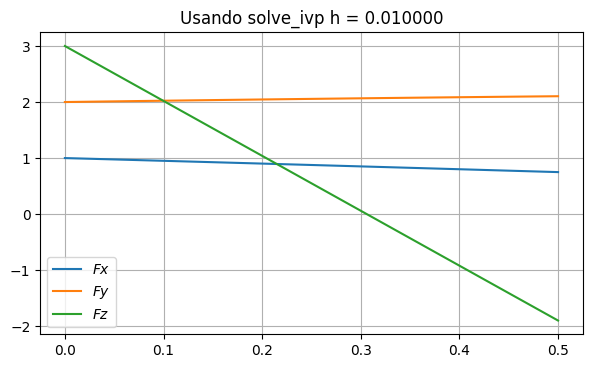

In [ ]:
"""
  Exercício 2)
"""

# Função de calculo da força feita sobre a bola.
def func(v, v0):
  Fx = -Ffric(v) * v * v0[0] + B * W * ( v0[2] * np.sin(angulo) - v0[1] * np.cos(angulo) )
  Fy = -Ffric(v) * v * v0[1] + B * W * v0[0] * np.cos(angulo)
  Fz = -Ffric(v) * v * v0[2] - B * W * v0[0] * np.sin(angulo) - g
  return np.array([Fx, Fy, Fz])

# Função que calcula a fricção.
def Ffric(v):
  resultado = 0.0039 + (0.0058/(1 + np.exp(0.2*(v - 35))))
  return resultado


def _euler_runge_kutta_k4_(ydiff, v0, y0, v, h):
        k1 = ydiff(v, v0)
        k2 = ydiff(v, v0 + h)
        k3 = ydiff(v, v0 + h)
        k4 = ydiff(v, v0 + h)
        y0 = y0 + (h/2)*(k1 + k2 + k3 + k4)
        return y0

def _euler_runge_kutta_k4_2(ydiff, v0, y0, v, h):
        k1 = h * ydiff(v, v0)
        k2 = h * ydiff(v + 0.5 * k1, v0 + h * 0.5)
        k3 = h * ydiff(v + 0.5 * k2, v0 + h * 0.5)
        k4 = h * ydiff(v + k3, v0 + h)
        y0 = y0 + (k1 + 2 * (k2 + k3) + k4) / 6
        return y0

def _erro_euler_mod_e_melhor_k4(ydiff, n, x0, y0, v, v0, h, fim):
    error_x = list()
    error_y = list()

    for i in range(1, n):
        y_aproximado = [y0]
        n = 1 * 2**i + 1
        x = np.linspace(x0, fim, n)

        for i in range(0, n-1):
            y_aproximado.append(_euler_runge_kutta_k4_(ydiff, v0, y_aproximado[i], v, h))
        error_x.append(x)
        error_y.append(y_aproximado)
    return error_x, error_y

# Variáveis dadas do EX.
v0 = np.array([38 * np.cos(np.degrees(1)), 0, 0.38 * np.sin(np.degrees(1))])
v = v0/np.linalg.norm(v0)
g = 9.8
B = 4.1E-4
W = 180 * 1.047198 * np.pi
angulo = np.degrees(0)

intervalo_t = [0, 0.5]
n = 51                                              # Quantidades de divisões,
h = 0.01                                            # tamanho dos saltos,
t = np.linspace(intervalo_t[0], intervalo_t[1], n)  # intervalo de t,
conds = [1, 2, 3]                                   # até 4 condições.

# Verificando os valores
print("Vetor V(0): ", v0)
print("v: ", v)
print("Gravidade: ", g)
print("B:", B)
print("W: ", W)
print("Angulo: ", angulo)
print("Ffric: ", Ffric(v))

# Chamando o solve_ivp do scipy para calcular o resultado.
F = solve_ivp(func, intervalo_t, conds, t_eval=t).y

plt.figure(figsize=(7,4), dpi=100)
plt.plot(t, F[0], label='$Fx$')
plt.plot(t, F[1], label='$Fy$')
plt.plot(t, F[2], label='$Fz$')
plt.title('Usando solve_ivp h = %f' % (t[1]-t[0]))
plt.grid()
plt.legend()
plt.show()
